###1. 모듈 임포트

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt install fonts-nanum

!sudo apt install font-manager
!rm -rf ~/.cache/matplotlib
!pip install koreanize-matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic'
import folium
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from datetime import datetime
import matplotlib.dates as md
from matplotlib import rc
import koreanize_matplotlib
from datetime import datetime
import matplotlib.dates as md
from pyproj import Transformer
import geopandas as gpd
import os
from folium import plugins
import matplotlib.ticker as ticker
import requests
import json
import csv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
The following package was automatically installed and is no longer required:
  libfuse2
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping

###2. 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)

In [ ]:
support=pd.read_csv('/content/drive/MyDrive/CJ올리브_5조/03. 프로젝트 데이터/데이터10.csv')

In [ ]:
support=support.drop(columns=['Unnamed: 0'])

In [ ]:
score=pd.read_csv('/content/drive/MyDrive/CJ올리브_5조/04. 데이터 분석/평가지표 계산/평가지표_minmax_scaling_점수화_데이터10.csv')

###3. 데이터 merge(최종 점수)

In [ ]:
score=score.loc[:, ['인증번호', '사회적 성과', '경제적 성과']]

In [ ]:
support['광역시도명']=support['광역시도명'].replace('경북', '경상북도')

In [ ]:
# support 938
# score 897

support = pd.merge(support, score, on='인증번호', how='right')

In [ ]:
support_s=support
support_s=support_s.drop(columns=['경제적 성과'])

In [ ]:
support_f=support
support_f=support_f.drop(columns=['사회적 성과'])

###3. 컬럼 삭제(사회적 성과)

In [ ]:
support_s=support_s.drop(columns=['미션과비전','취약계층근로자(총인원)','유급근로자총인원_2021','유급근로자총인원_2020','일자리창출_금액','사회서비스제공_금액','근로자처우개선_금액','지역사회재투자_금액','기타_금액','이사회_임원등',
       '이사회_근로자대표', '이사회_수혜자', '이사회_지역사회','이사회_기타','유급근로자평균임금', '취약계층평균임금', '미처분이익잉여금', '유급근로자총인원'])

In [ ]:
support_s=support_s.drop(columns=['신청 기업명','시군구명'])
# support_s=support_s.drop(columns=['신청 기업명','광역시도명', '시군구명'])

In [ ]:
support_s=pd.get_dummies(support_s, columns=['광역시도명', '인증년도', '설립연도'])

In [ ]:
# support_s=support_s.drop(columns=['미션과비전','취약계층근로자(총인원)','유급근로자총인원_2021','유급근로자총인원_2020','일자리창출_금액','사회서비스제공_금액','근로자처우개선_금액','지역사회재투자_금액','기타_금액','이사회_임원등',
#        '이사회_근로자대표', '이사회_수혜자', '이사회_지역사회','이사회_기타','유급근로자평균임금', '취약계층평균임금', '미처분이익잉여금', '신청 기업명','시군구명', '유급근로자총인원'])

In [ ]:
# support_s=support_s.drop(columns=['주업종_건설업(F)', '주업종_광업(B)', '주업종_교육 서비스업(P)',
#        '주업종_금융 및 보험업(K)', '주업종_기타', '주업종_농업, 임업 및 어업(A)', '주업종_도매 및 소매업(G)',
#        '주업종_보건업 및 사회복지 서비스업(Q)', '주업종_부동산업 및 임대업(L)',
#        '주업종_사업시설관리 및 사업지원 서비스업(N)', '주업종_숙박 및 음식점업(I)',
#        '주업종_예술, 스포츠 및 여가관련 서비스업(R) ', '주업종_운수업(H)', '주업종_전기, 가스, 증기 및 수도사업(D)',
#        '주업종_전문, 과학 및 기술 서비스업(M)', '주업종_제조업(C)', '주업종_출판, 영상, 방송통신 및 정보서비스업(J)',
#        '주업종_하수, 폐기물처리, 원료재생 및 환경복원업(E)', '주업종_협회 및 단체, 수리 및 개인 서비스업(S)',
#        '인증유형_사회서비스제공형', '인증유형_일자리제공형', '인증유형_지역사회공헌형', '인증유형_창의 혁신형',
#        '인증유형_혼합형'])

In [ ]:
# support_s=support_s.drop(columns=['비취약계층_제공인원', '취약계층_제공인원', '사회서비스_총인원수'])

In [ ]:
# support_s=support_s.drop(columns=['매출액_2020', '매출액_2021'])

###4. 로그 변환 XXX

In [ ]:
columns_to_extract = ['이사회_연간개최회수', '지분율1', '지분보유인원', '지분보유기업',
                      '취약계층평균근로시간', '비취약계층근로자총인원', '비취약계층평균임금', '비취약계층평균근로시간',
                      '유급근로자평균근로시간', '취약계층_제공인원', '비취약계층_제공인원', '사회서비스_총인원수',
                      '매출액_2020', '매출액_2021', '영업이익_2020', '영업이익_2021',
                      '당기순이익_2020', '당기순이익_2021', '정부지원_2020', '정부지원_2021',
                      '기업후원_2020', '기업후원_2021', '일반지원_2020', '일반지원_2021',
                      '근로자처우개선_수혜자수', '기타_지역사회', '지역사회재투자_수혜자수', '사회서비스제공_수혜자수']

num = support_s[columns_to_extract]

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-20-7ed8682d7ec9>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 4))


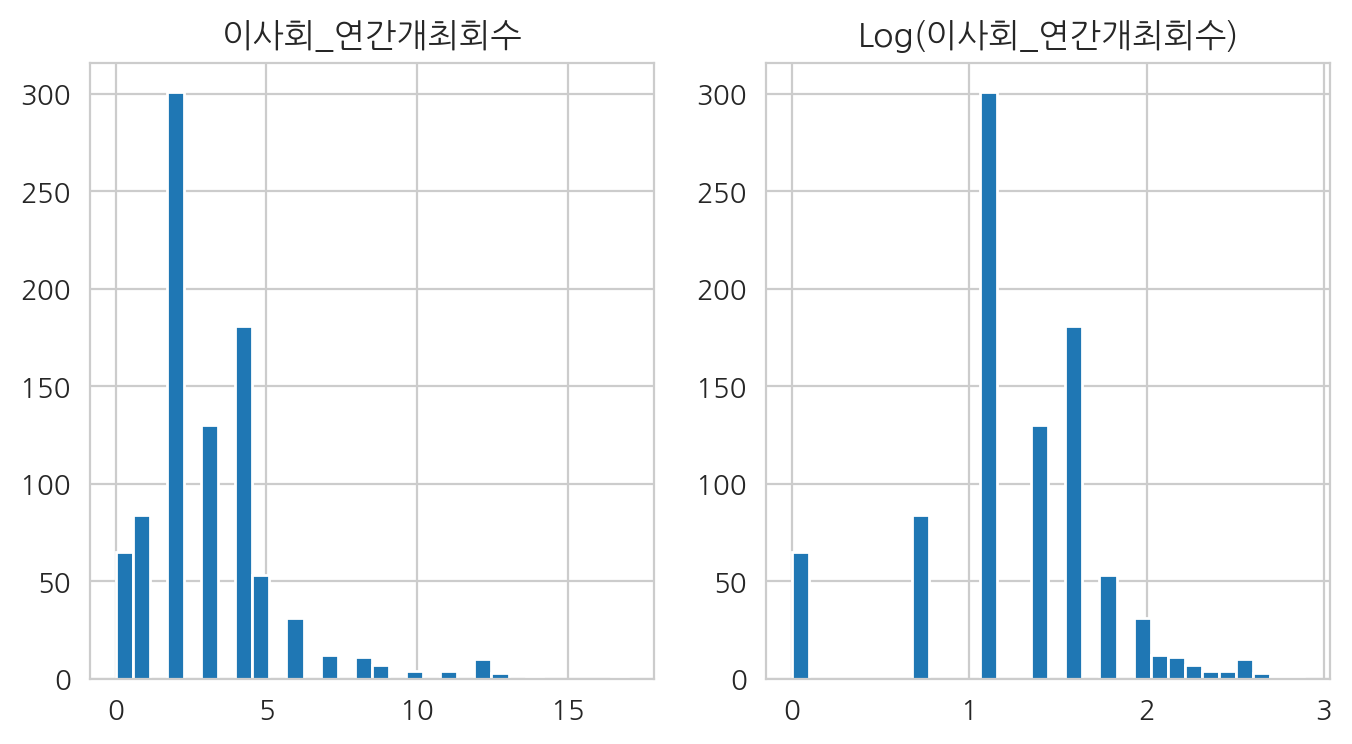

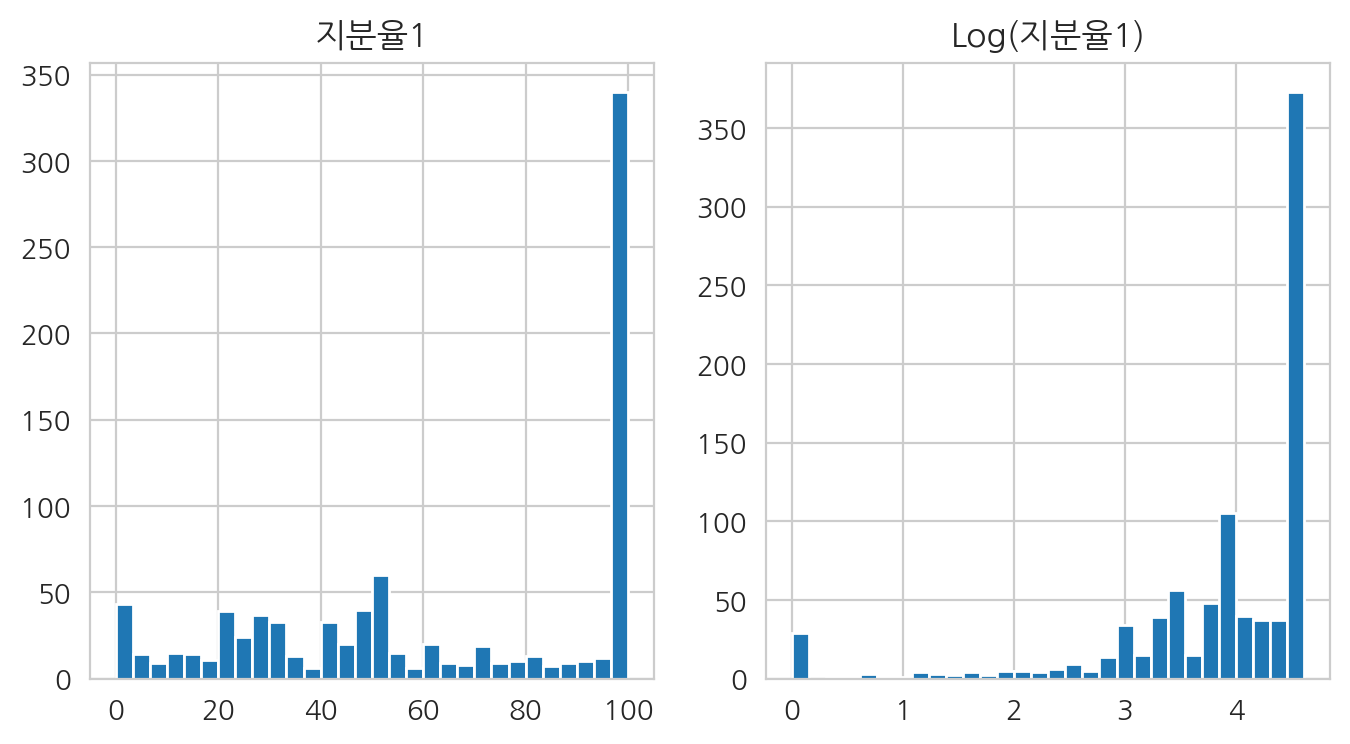

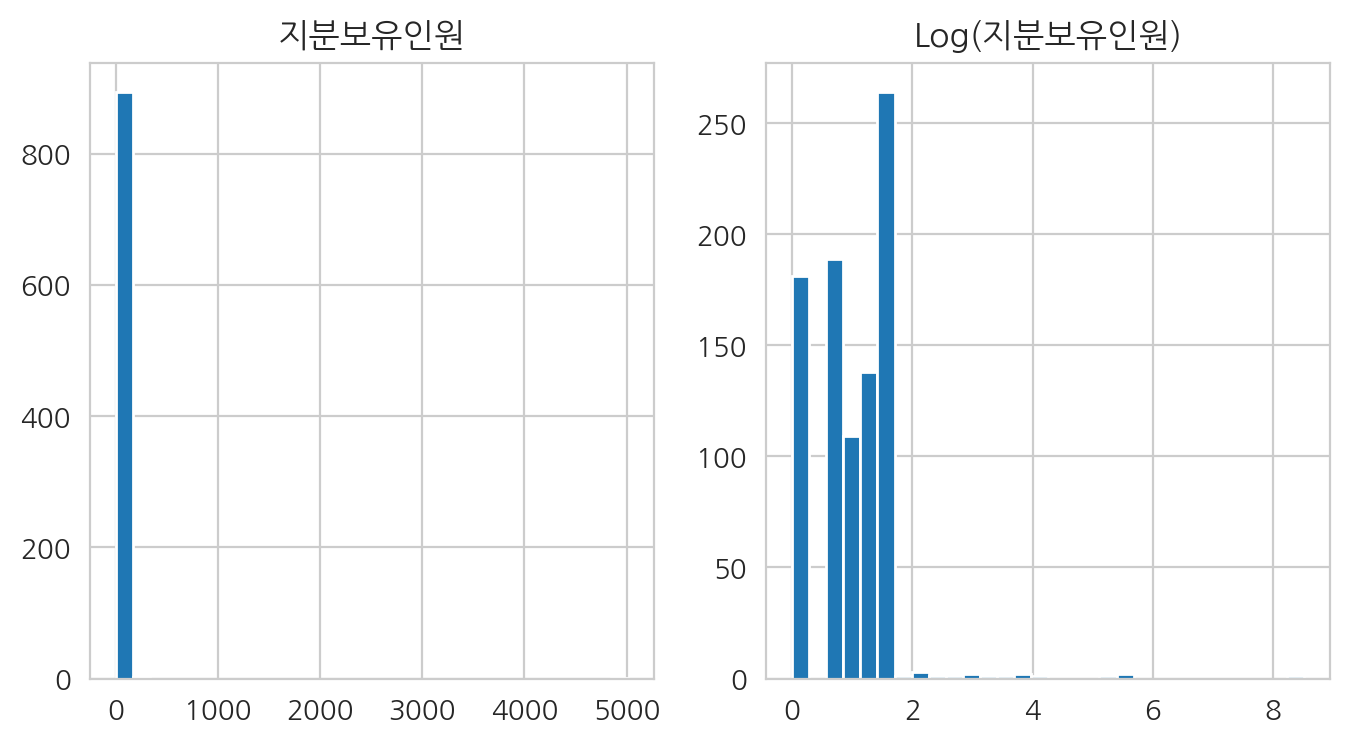

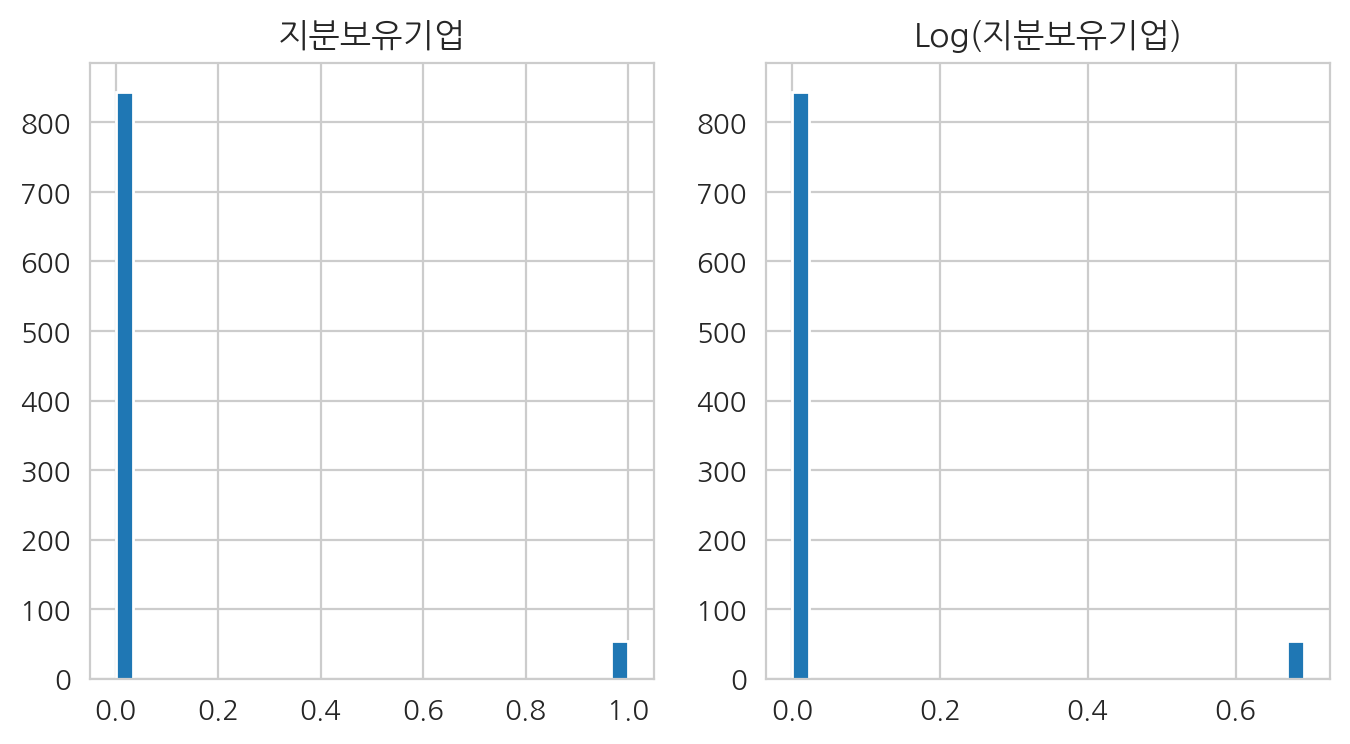

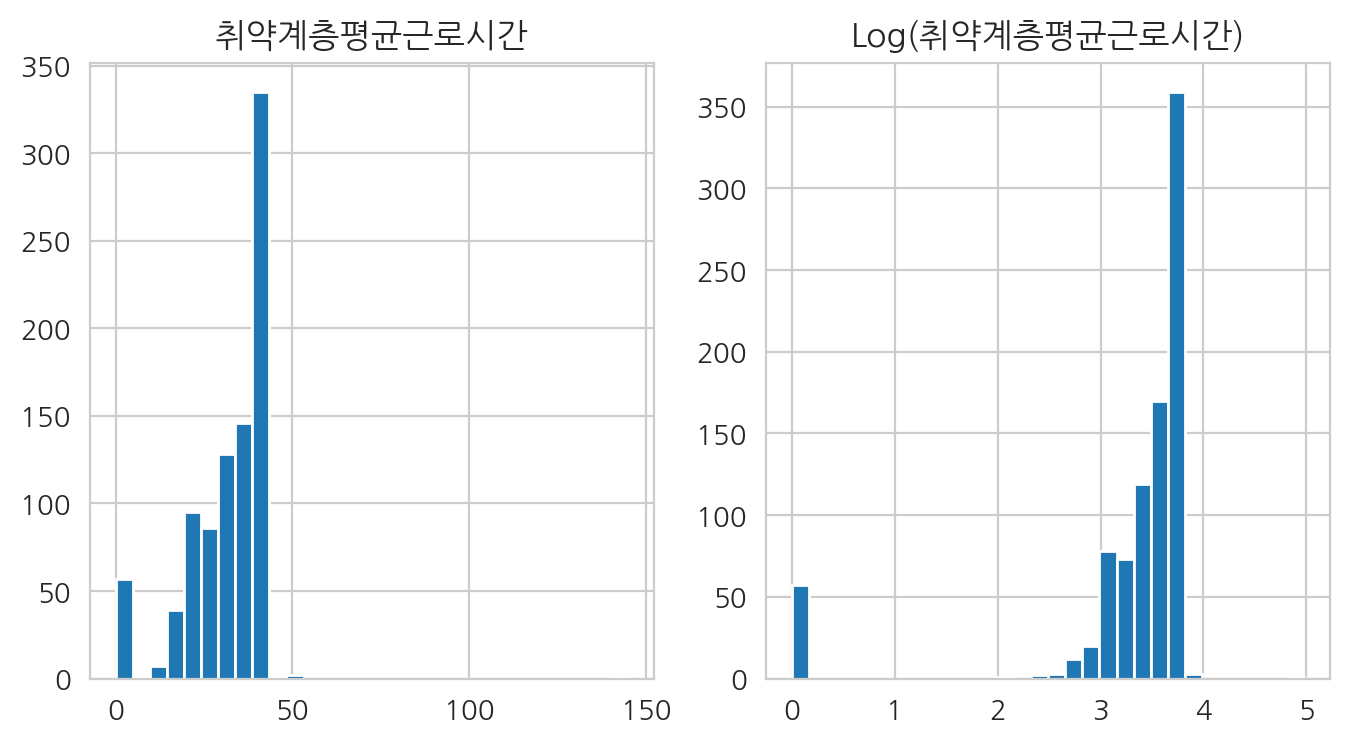

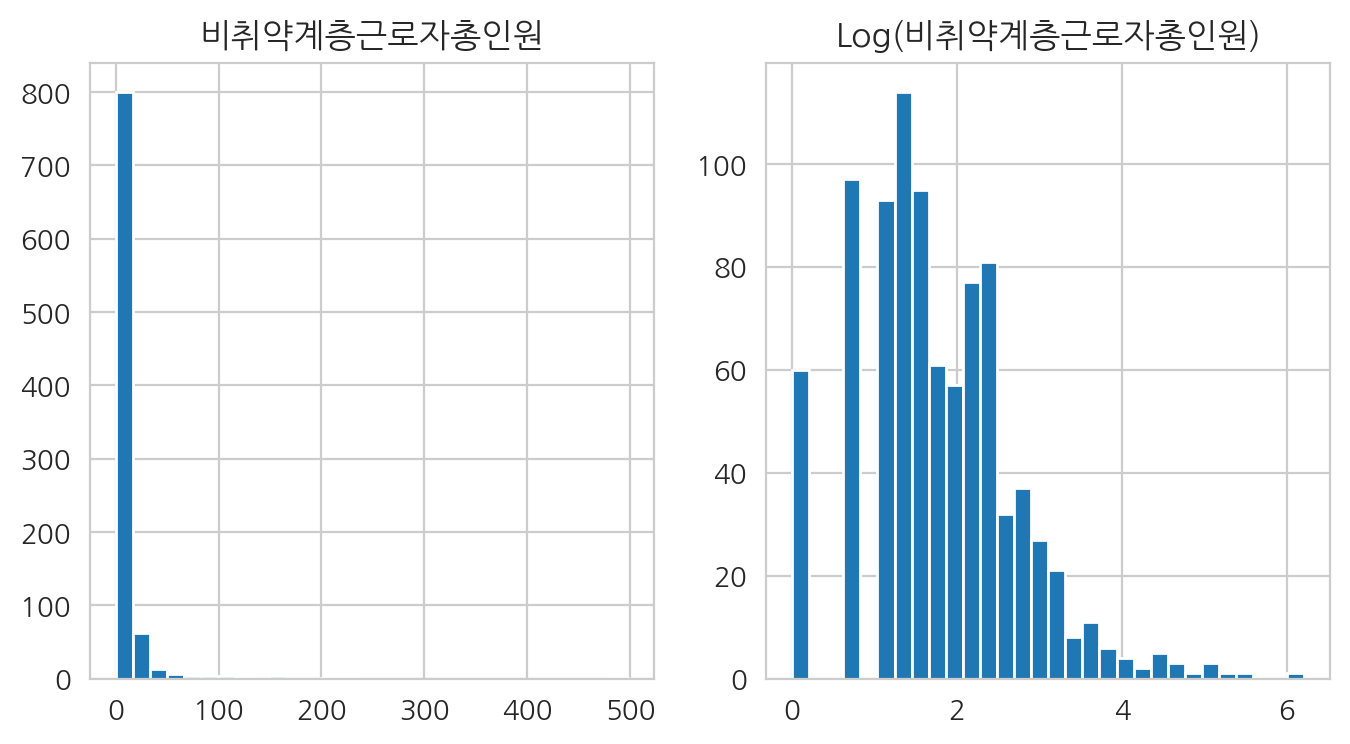

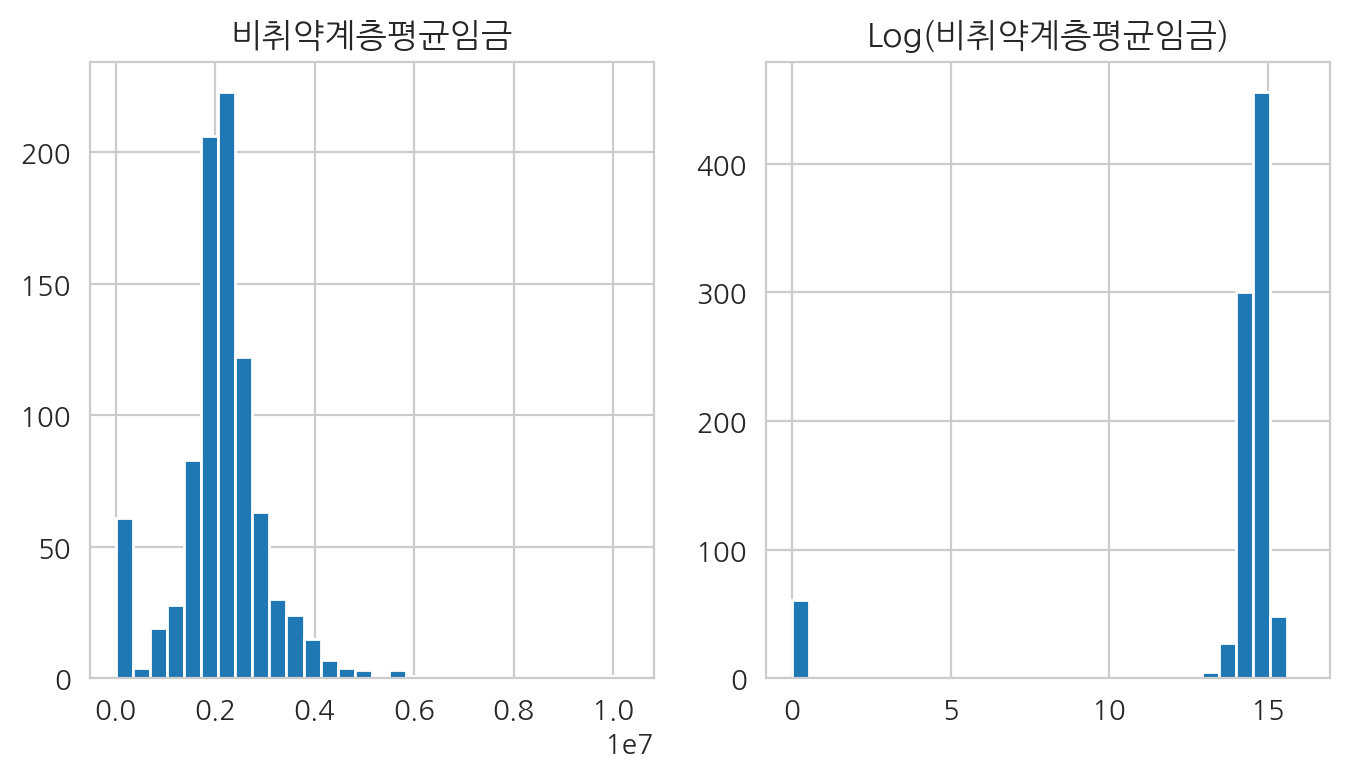

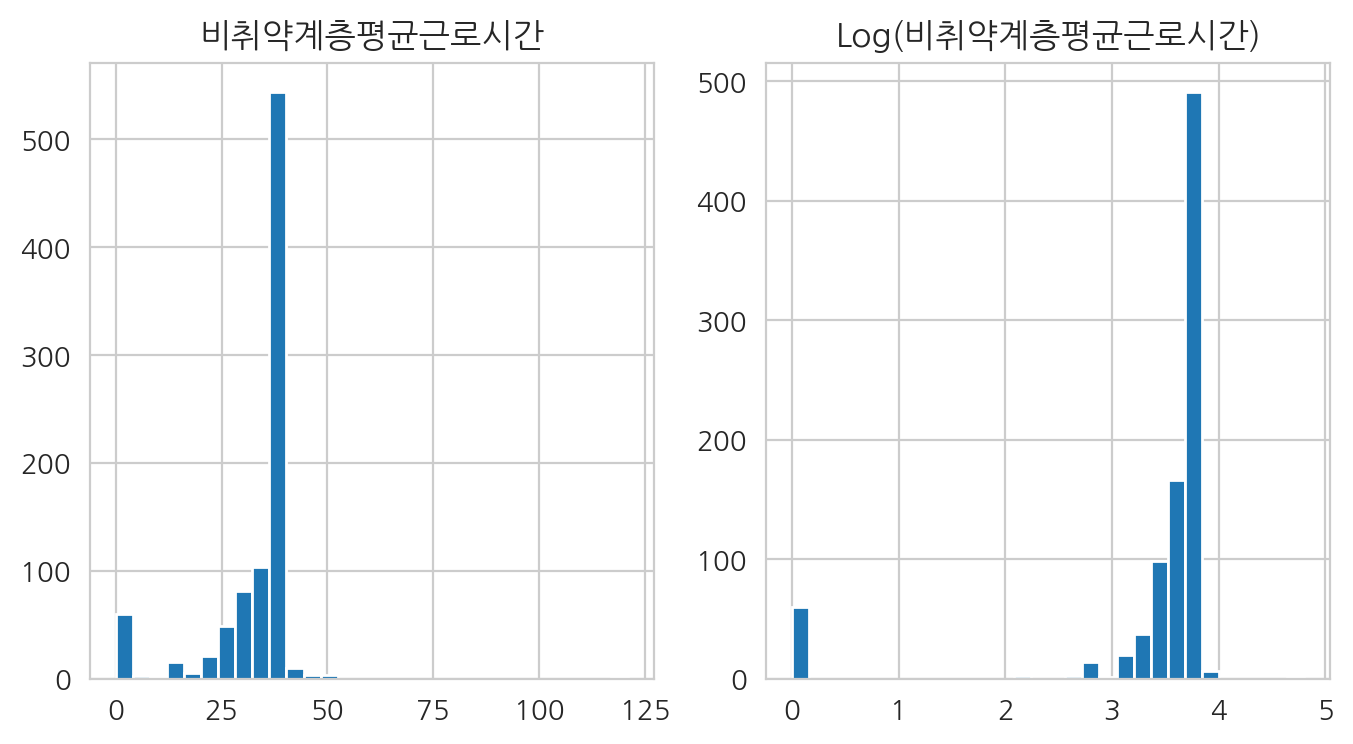

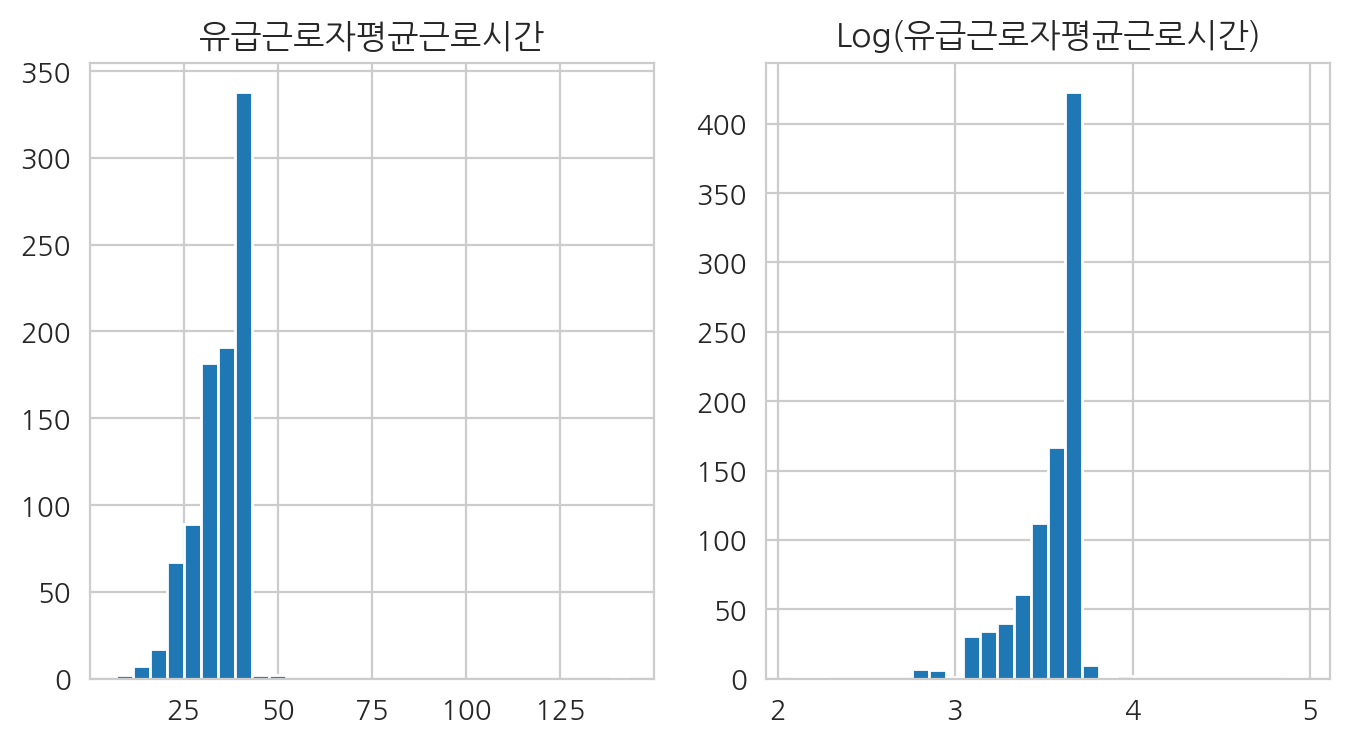

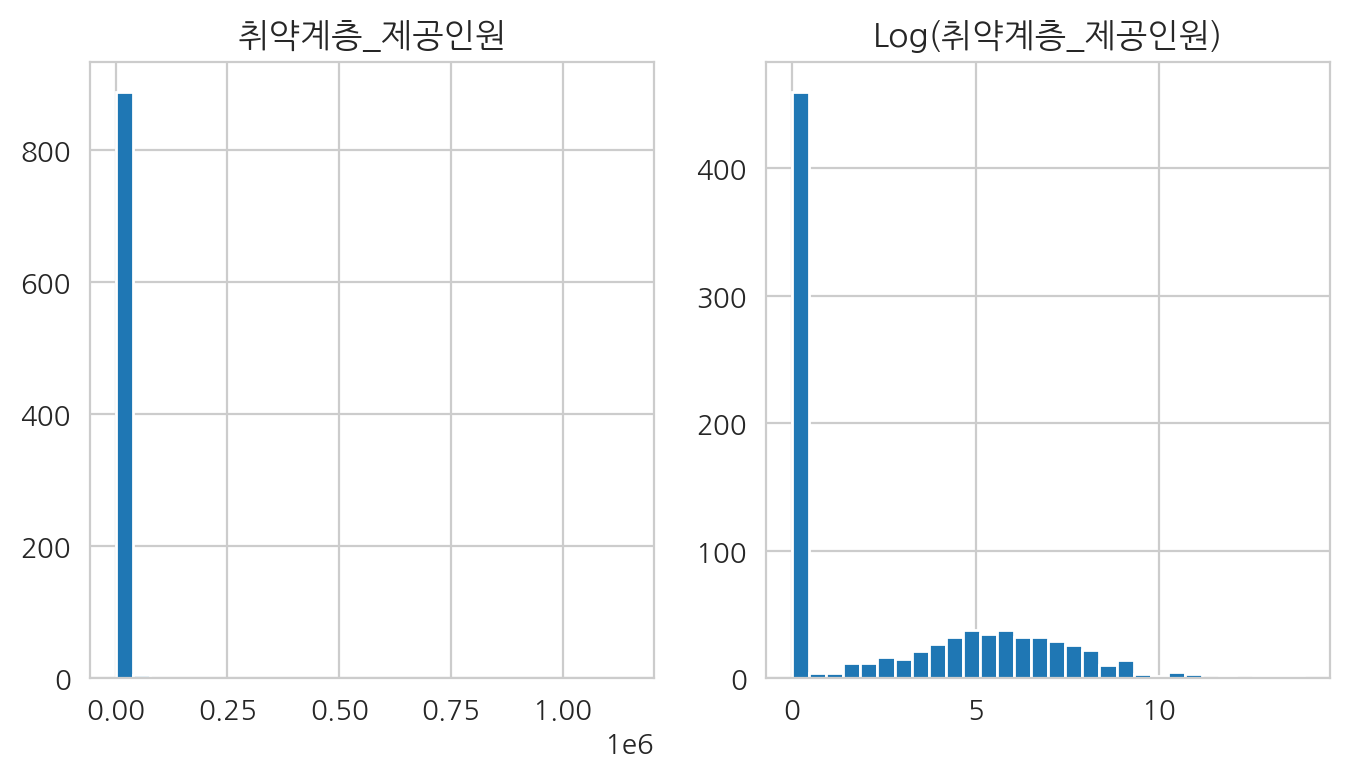

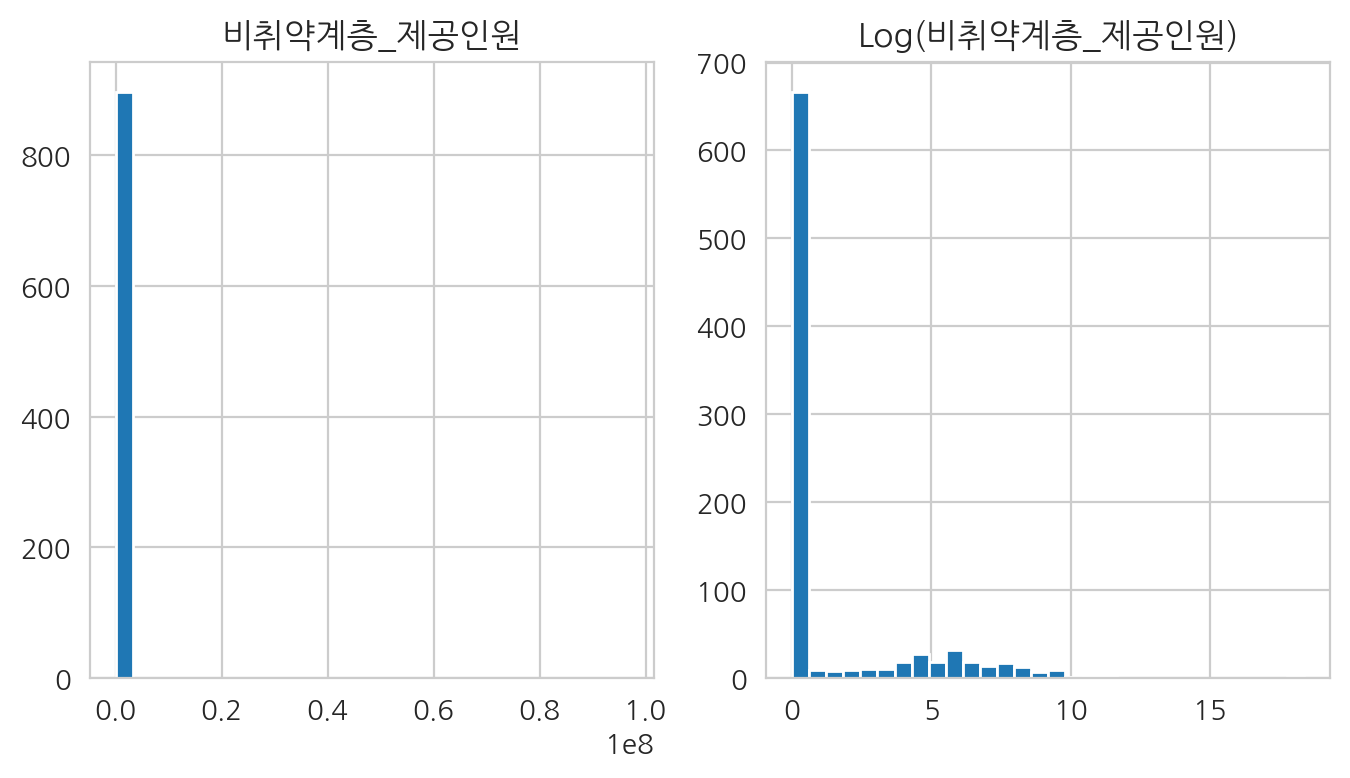

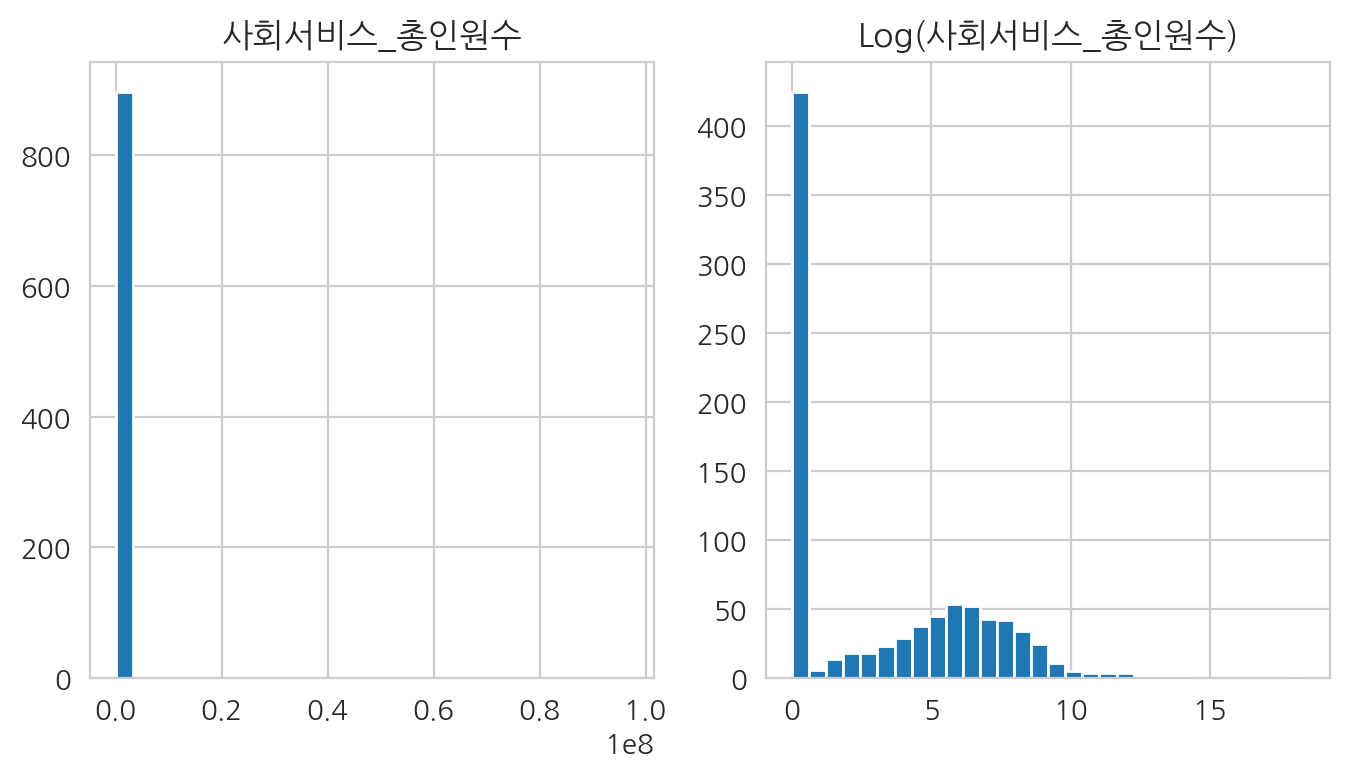

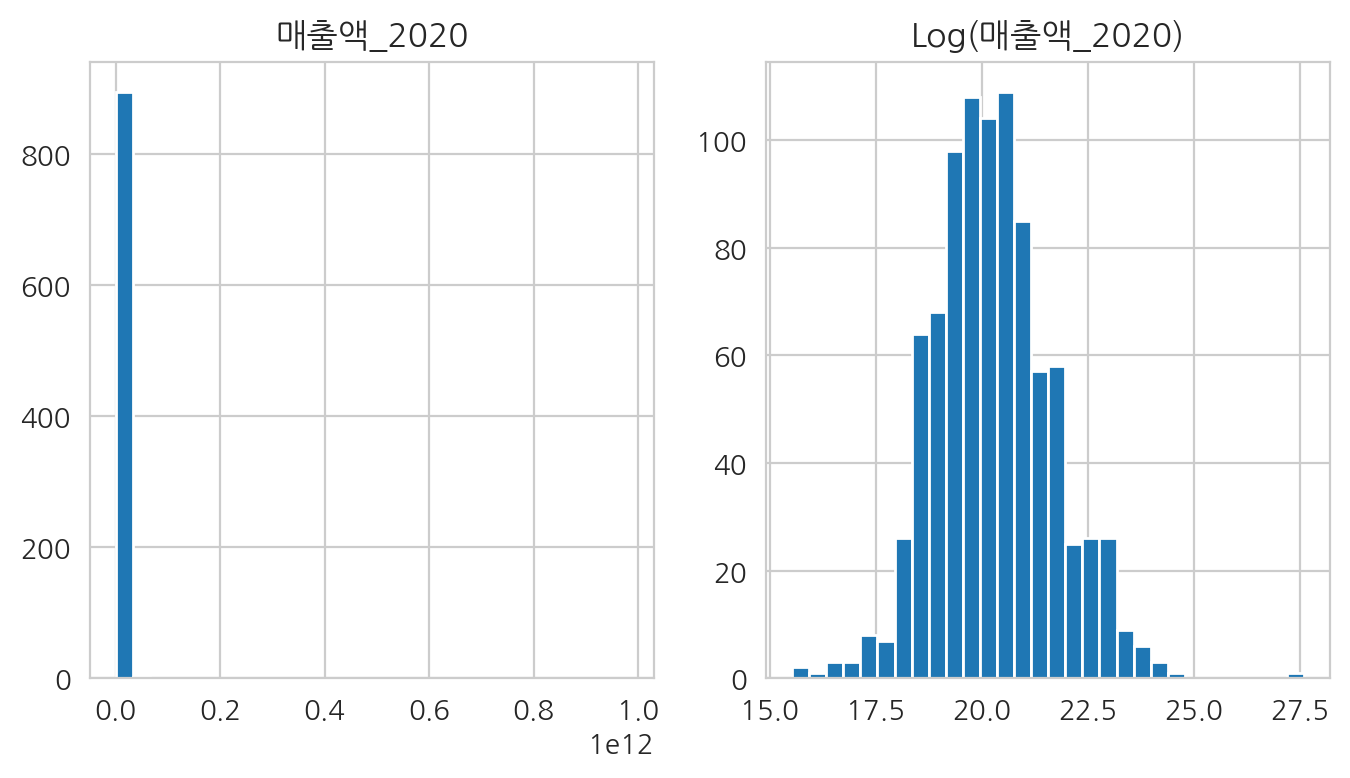

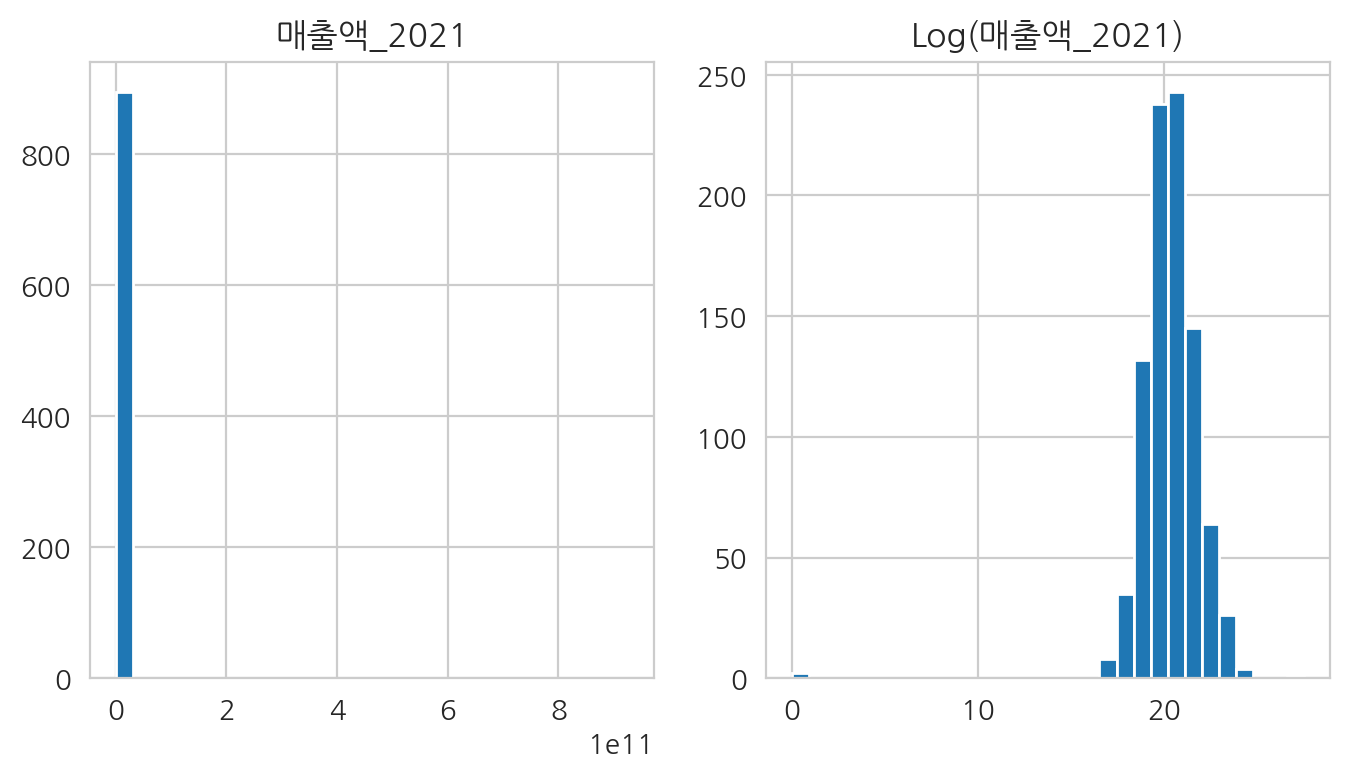

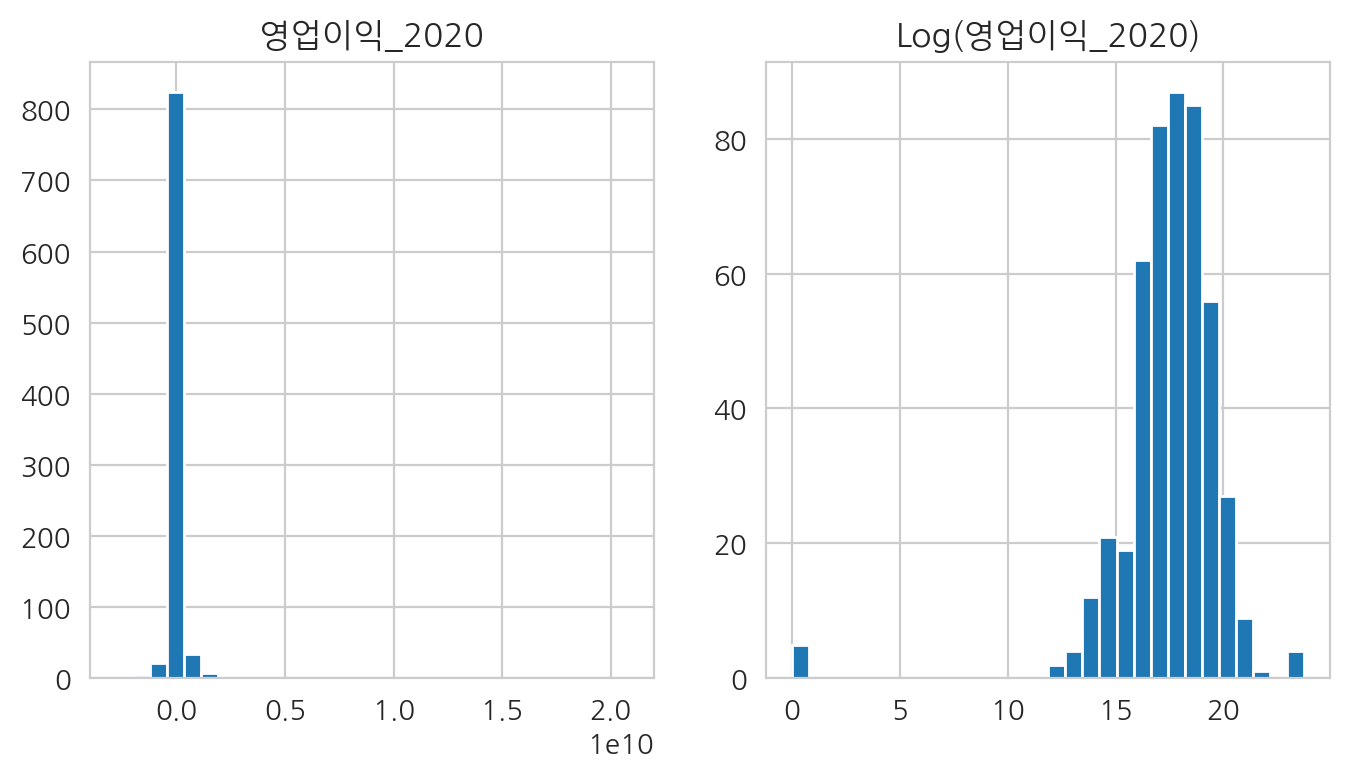

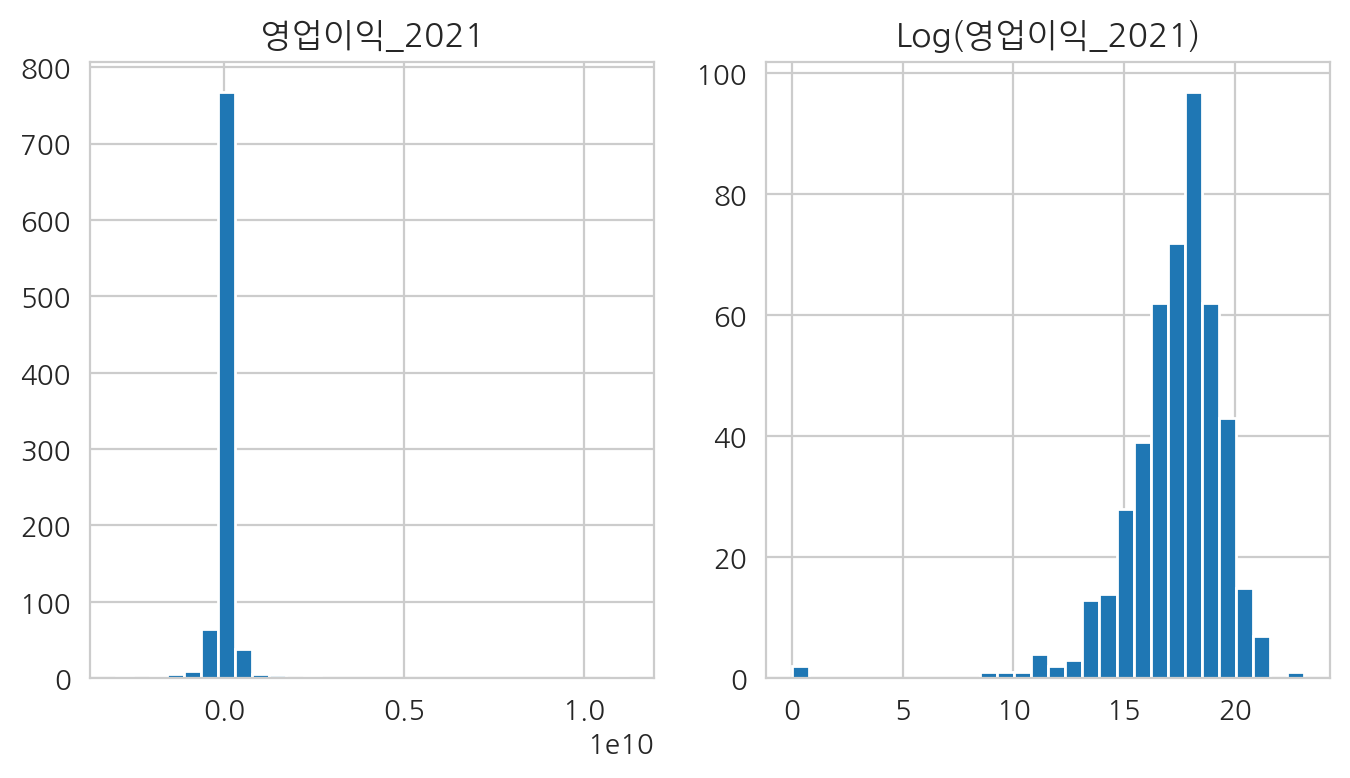

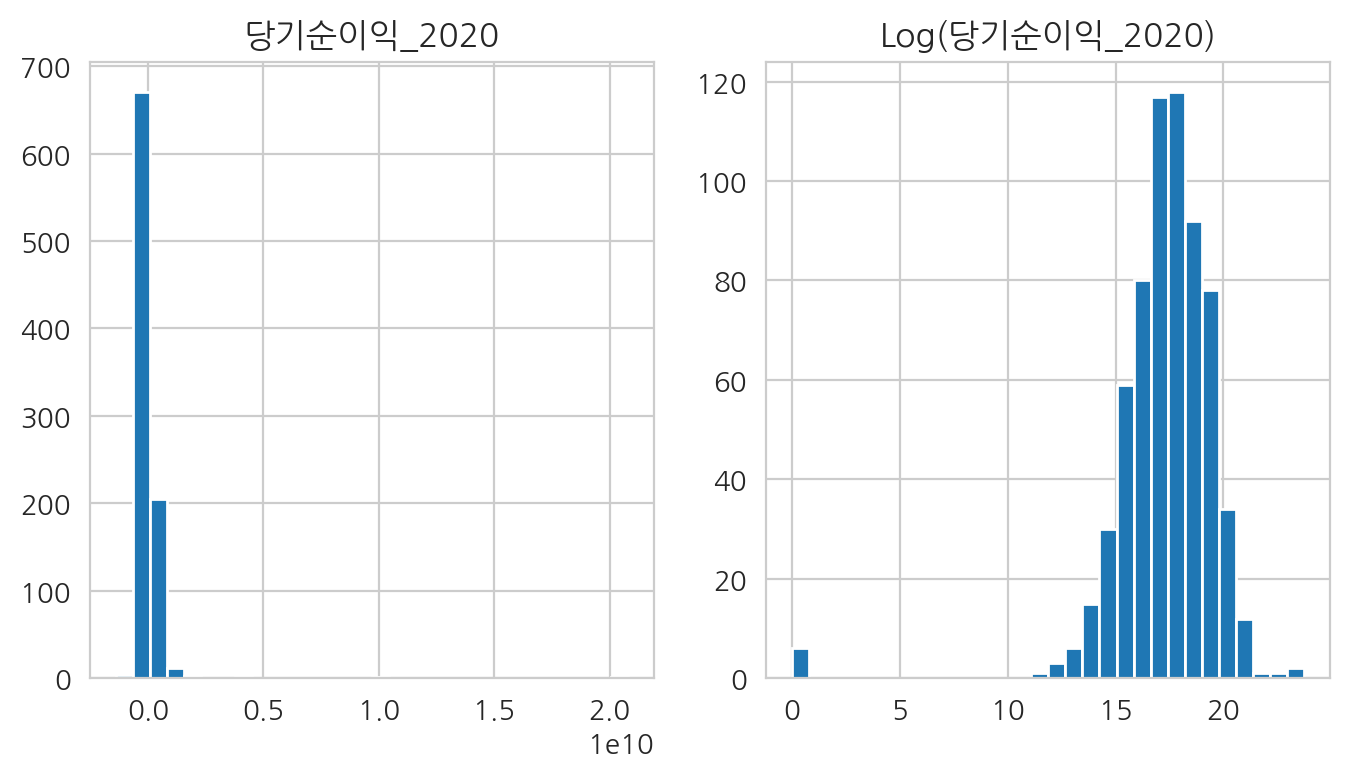

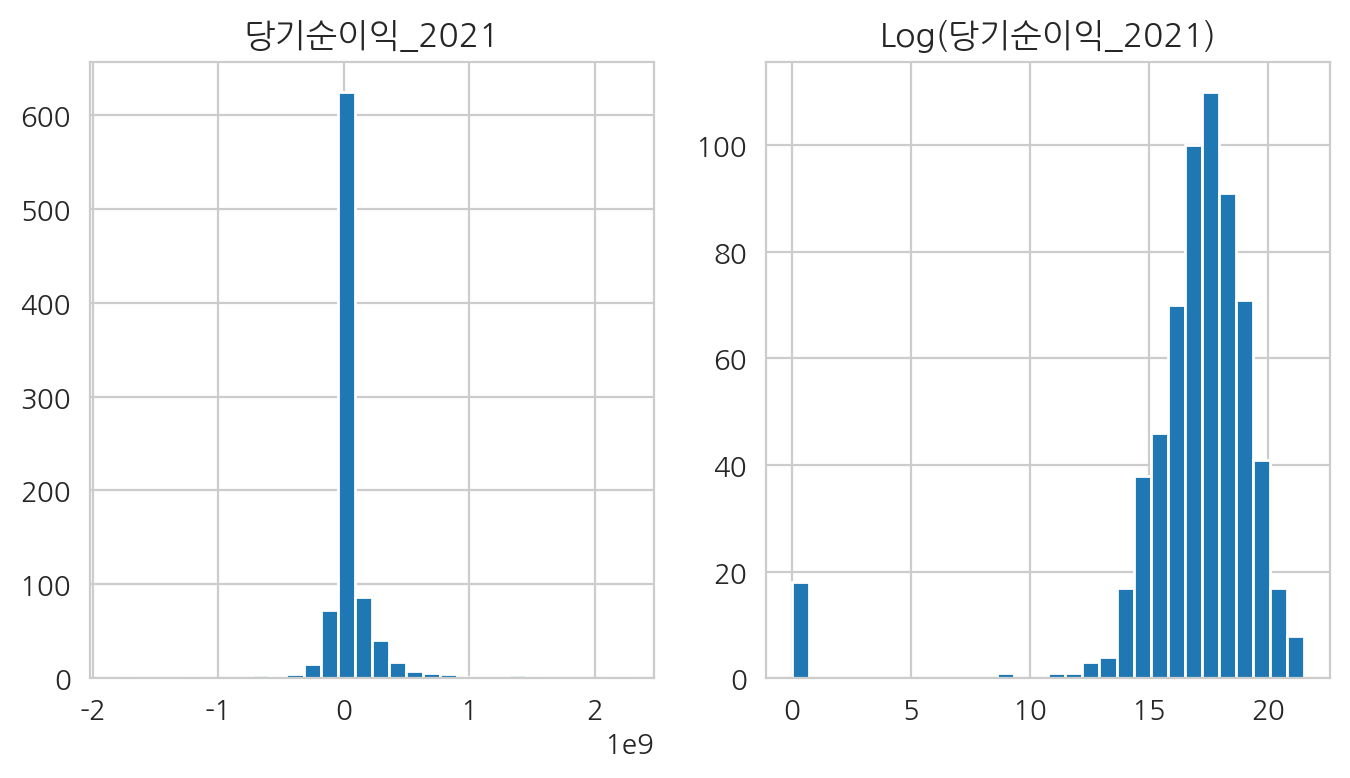

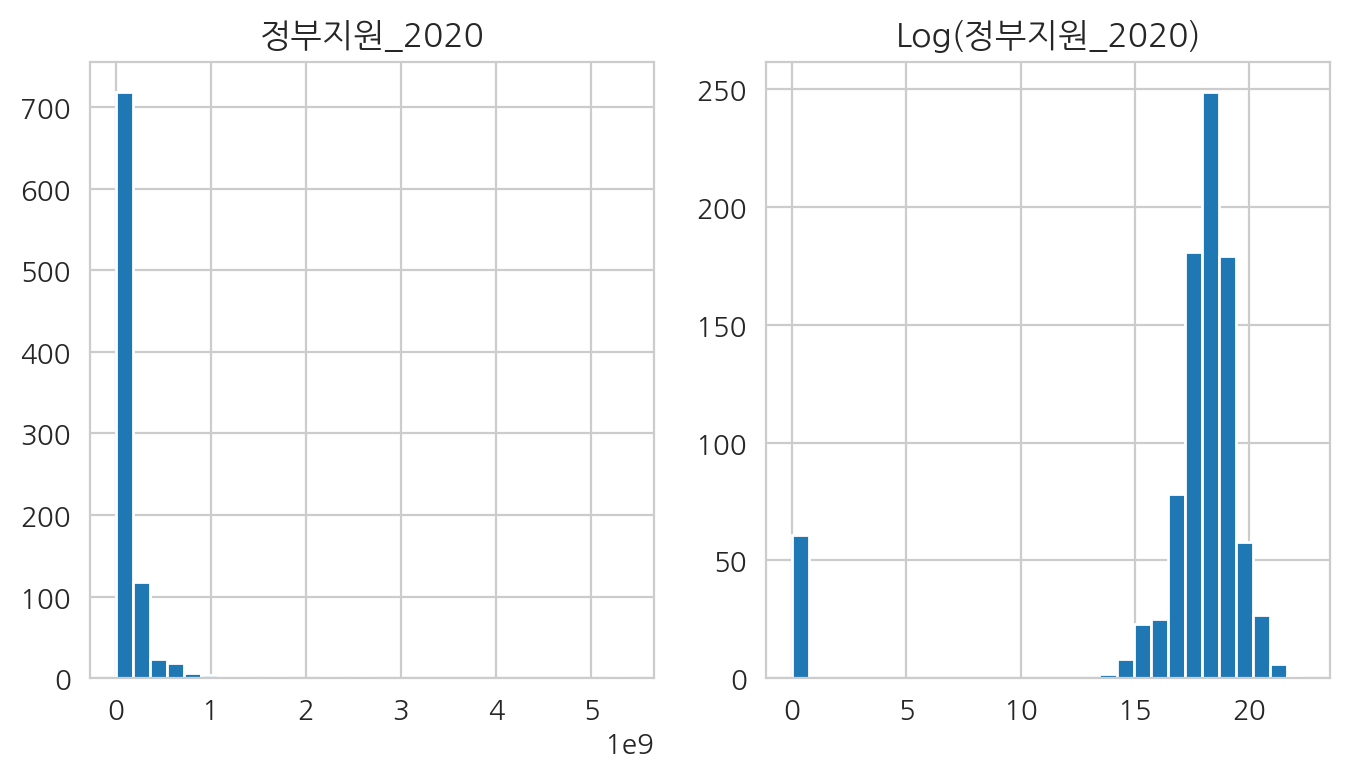

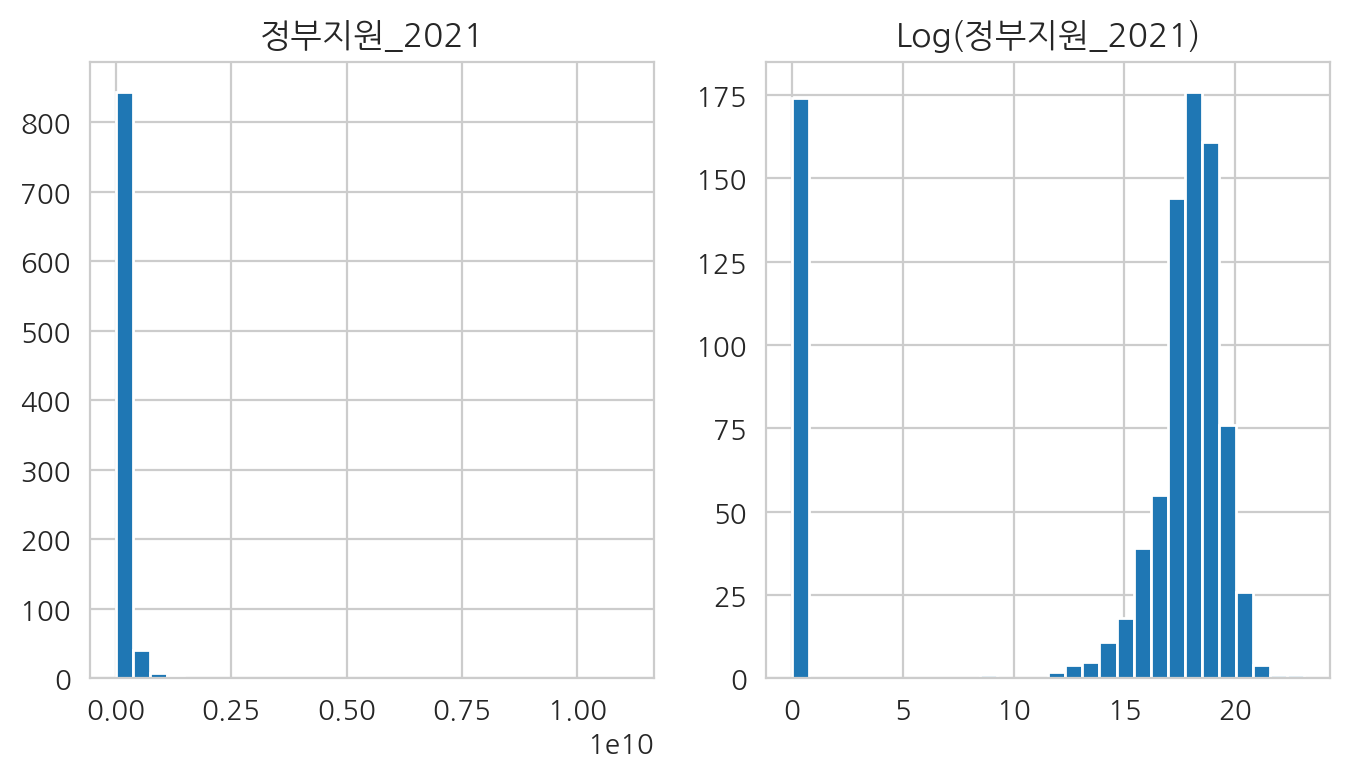

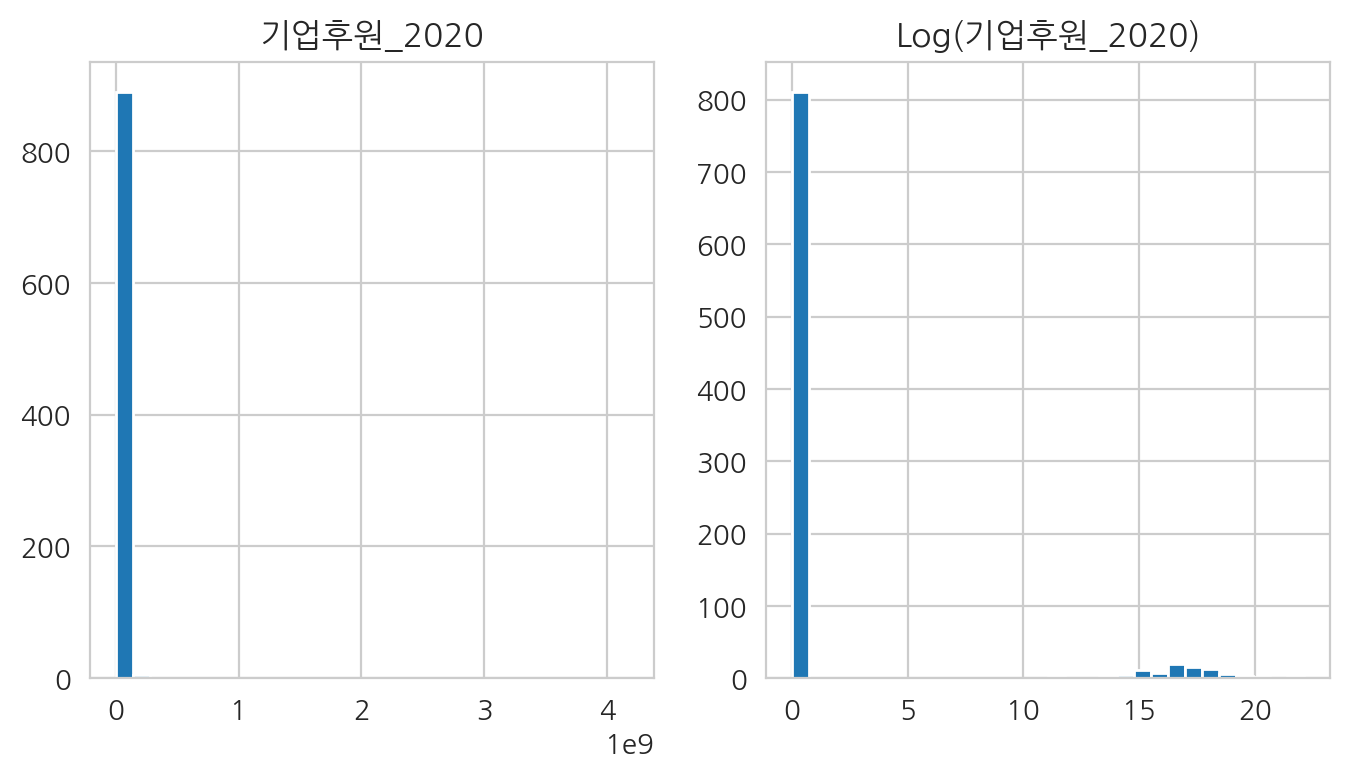

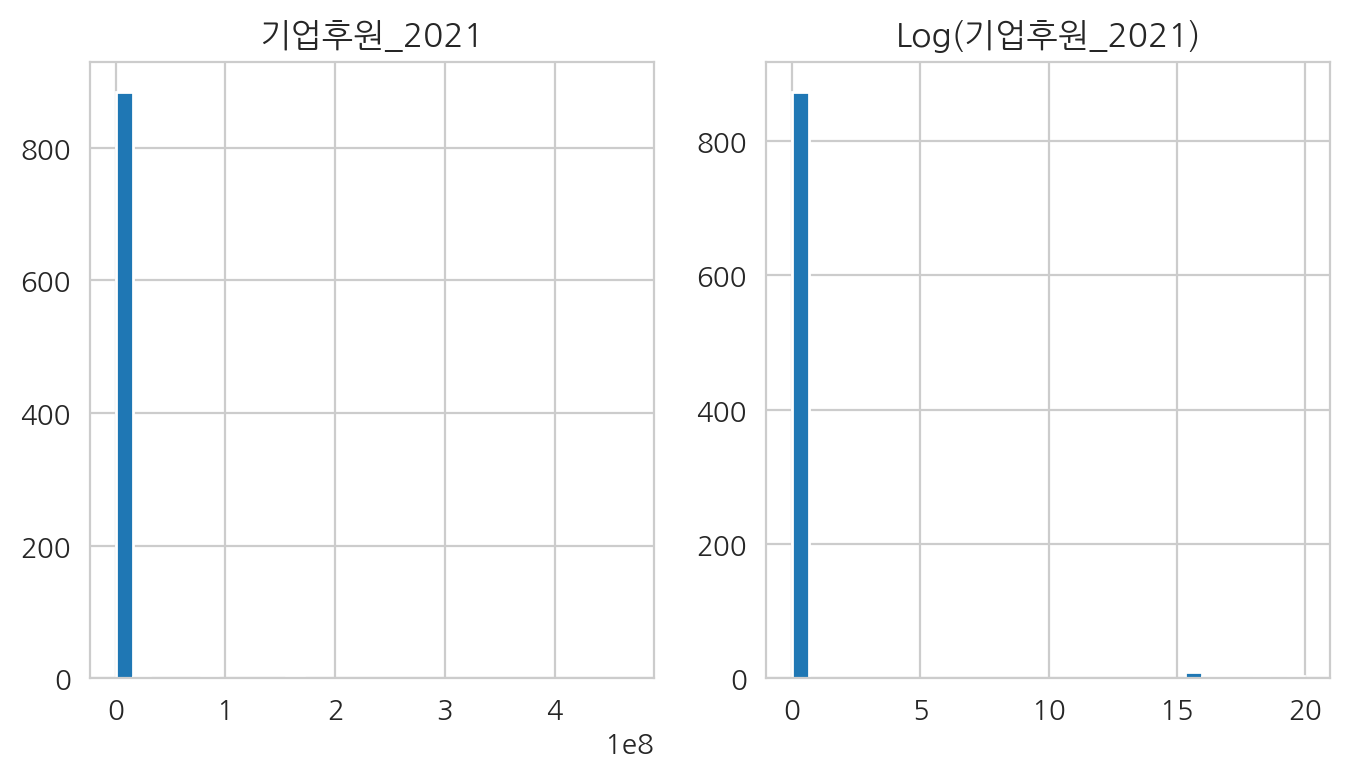

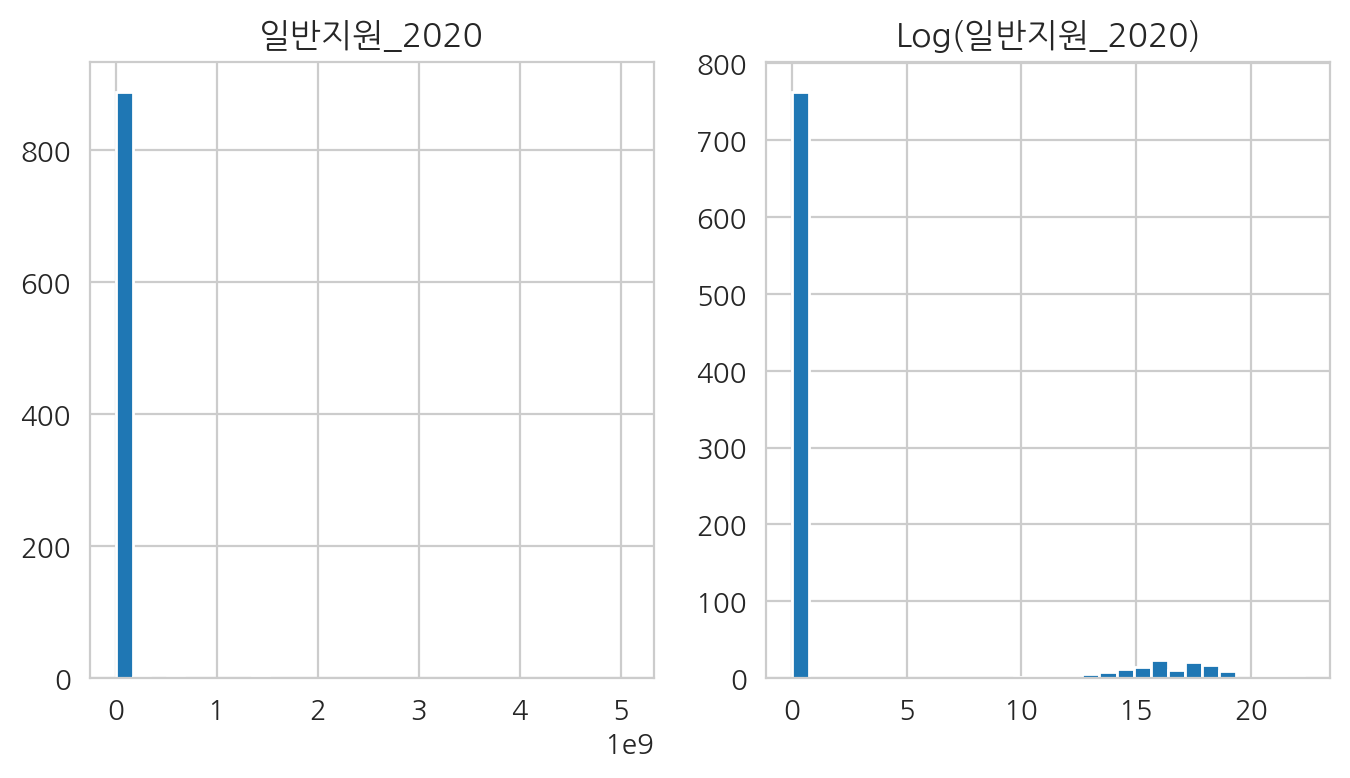

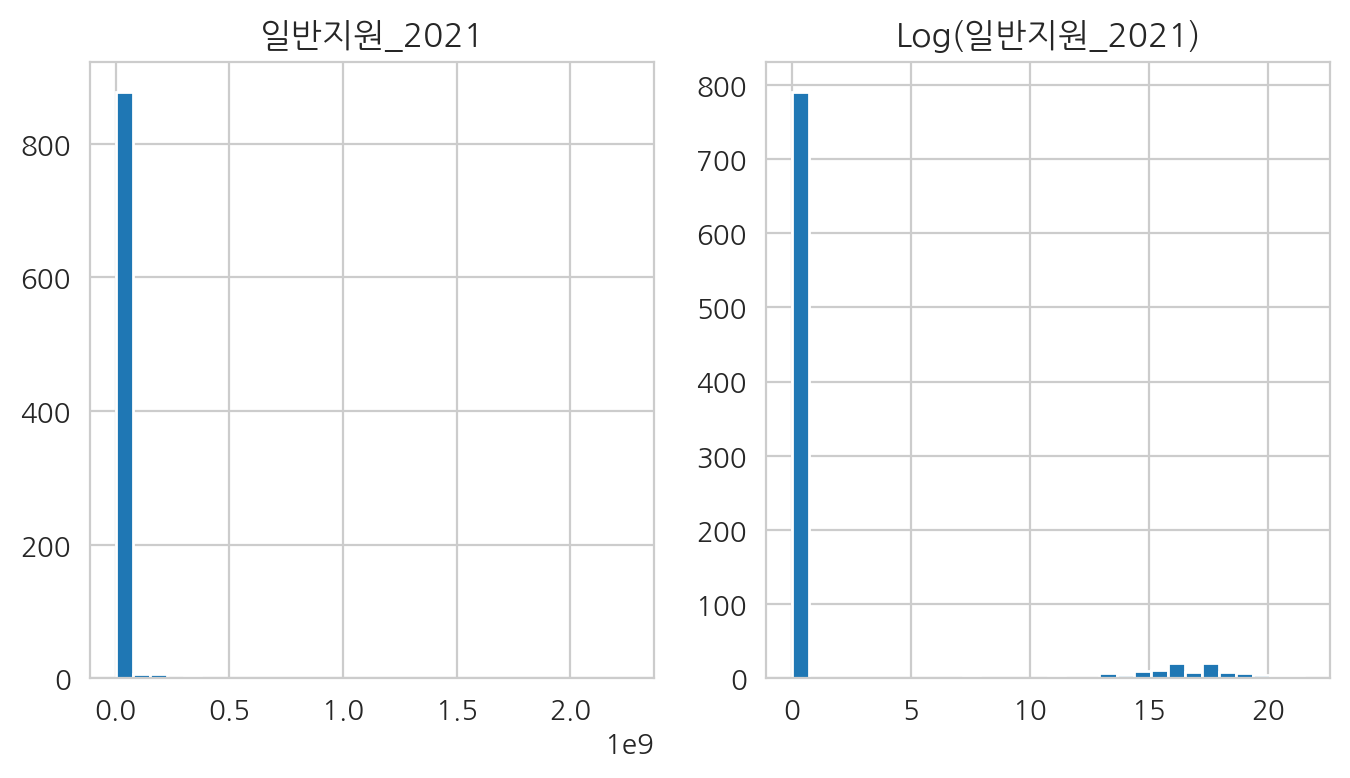

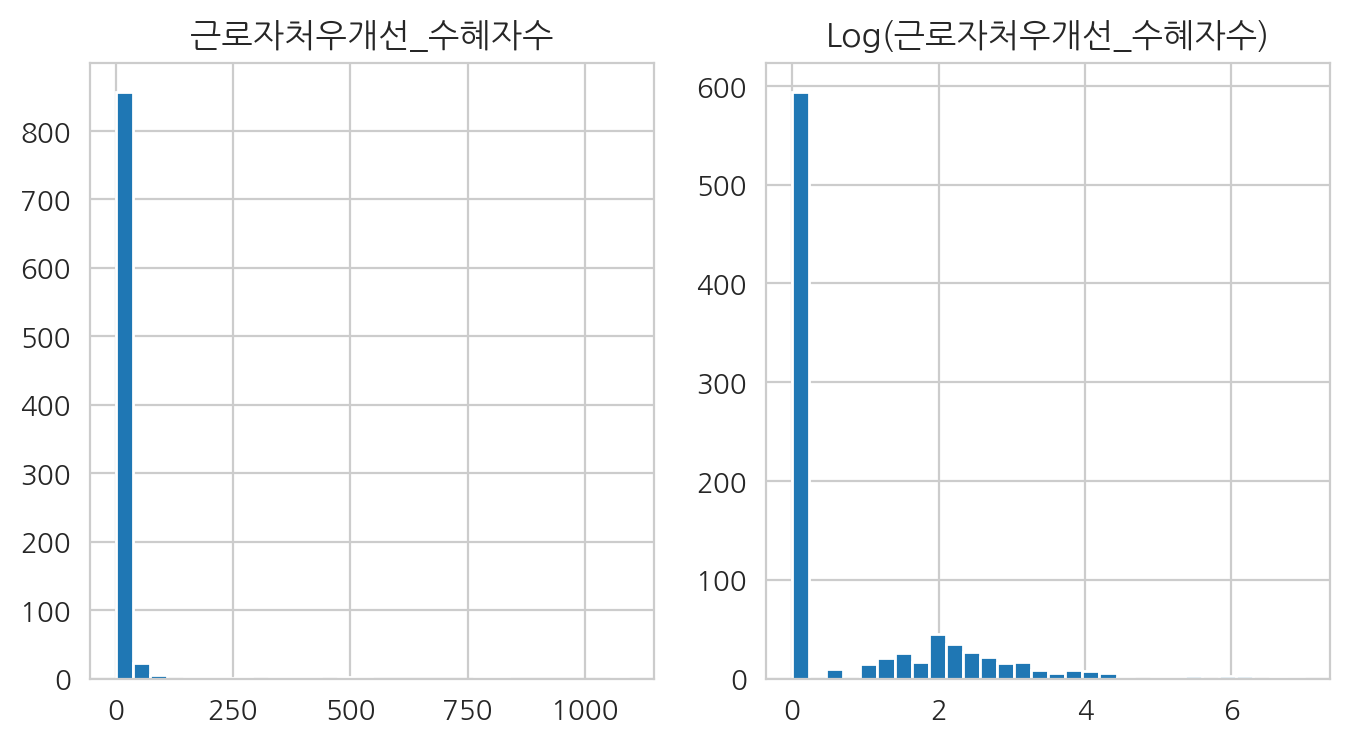

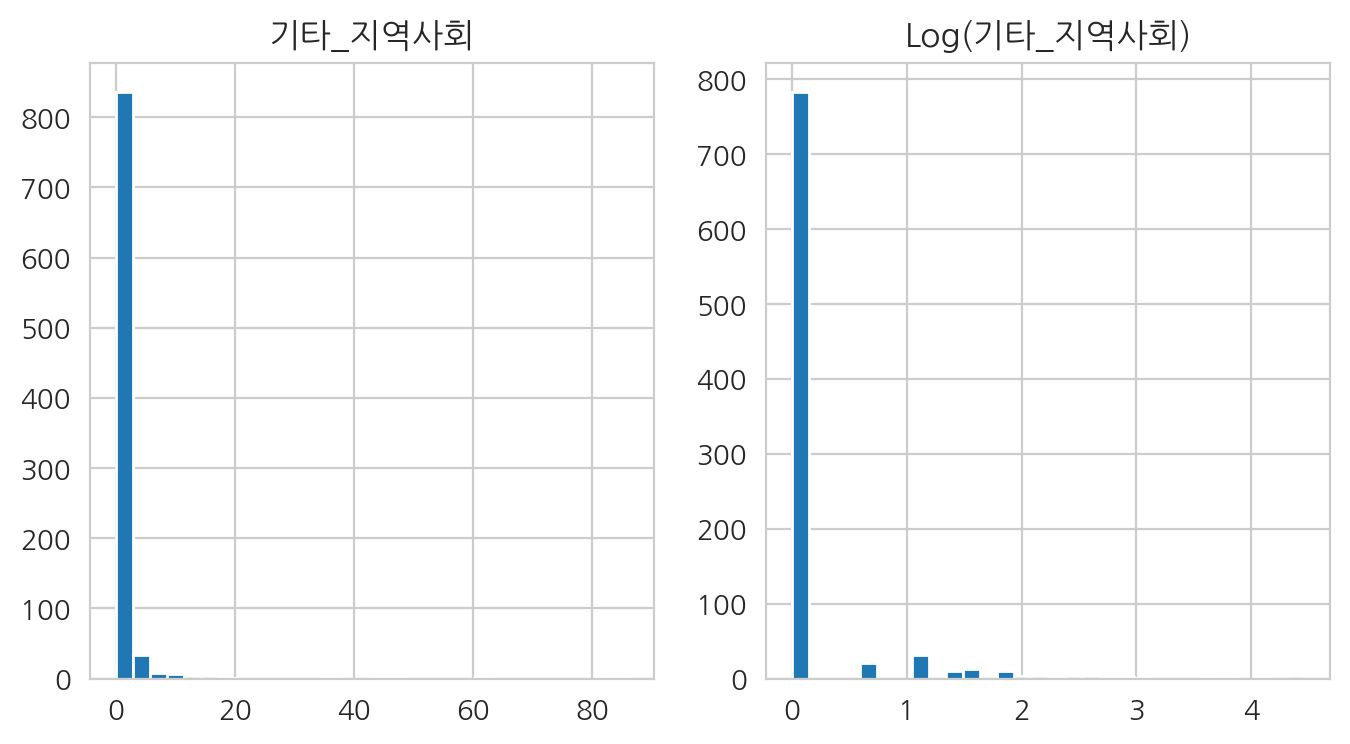

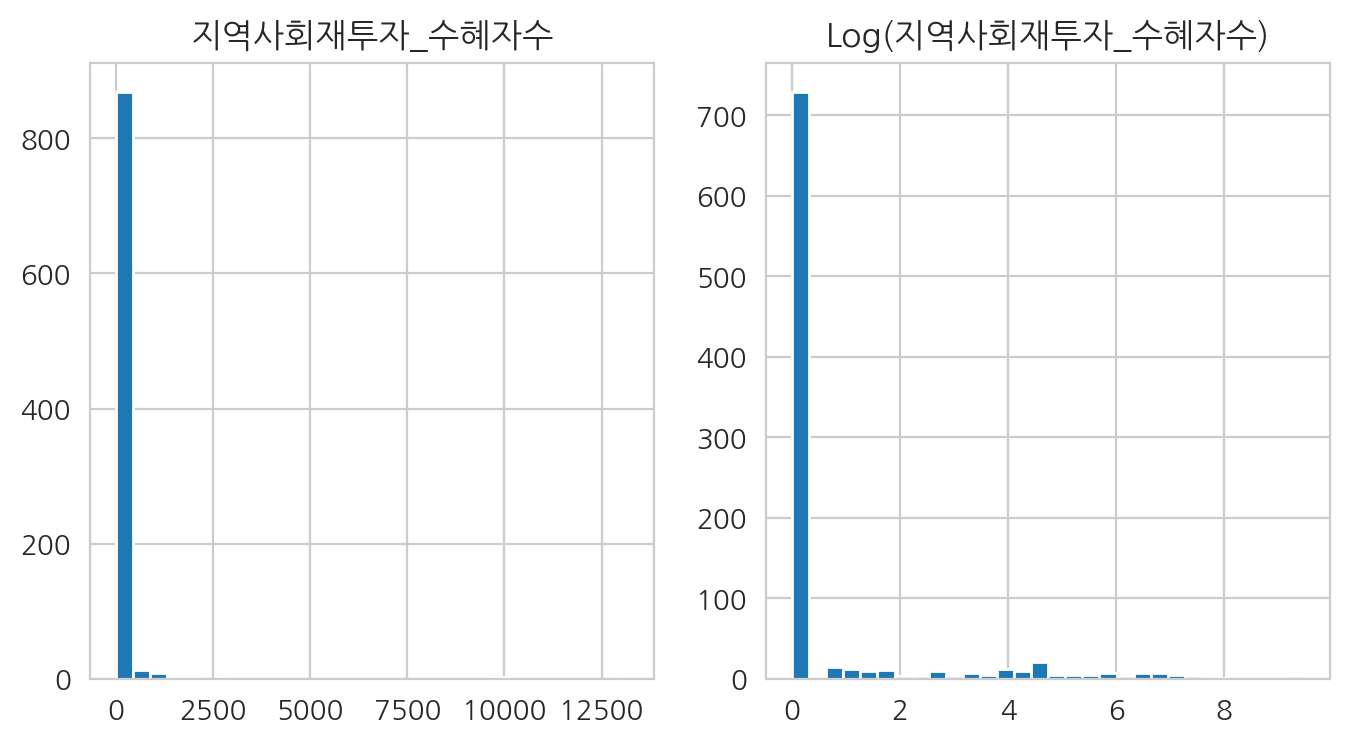

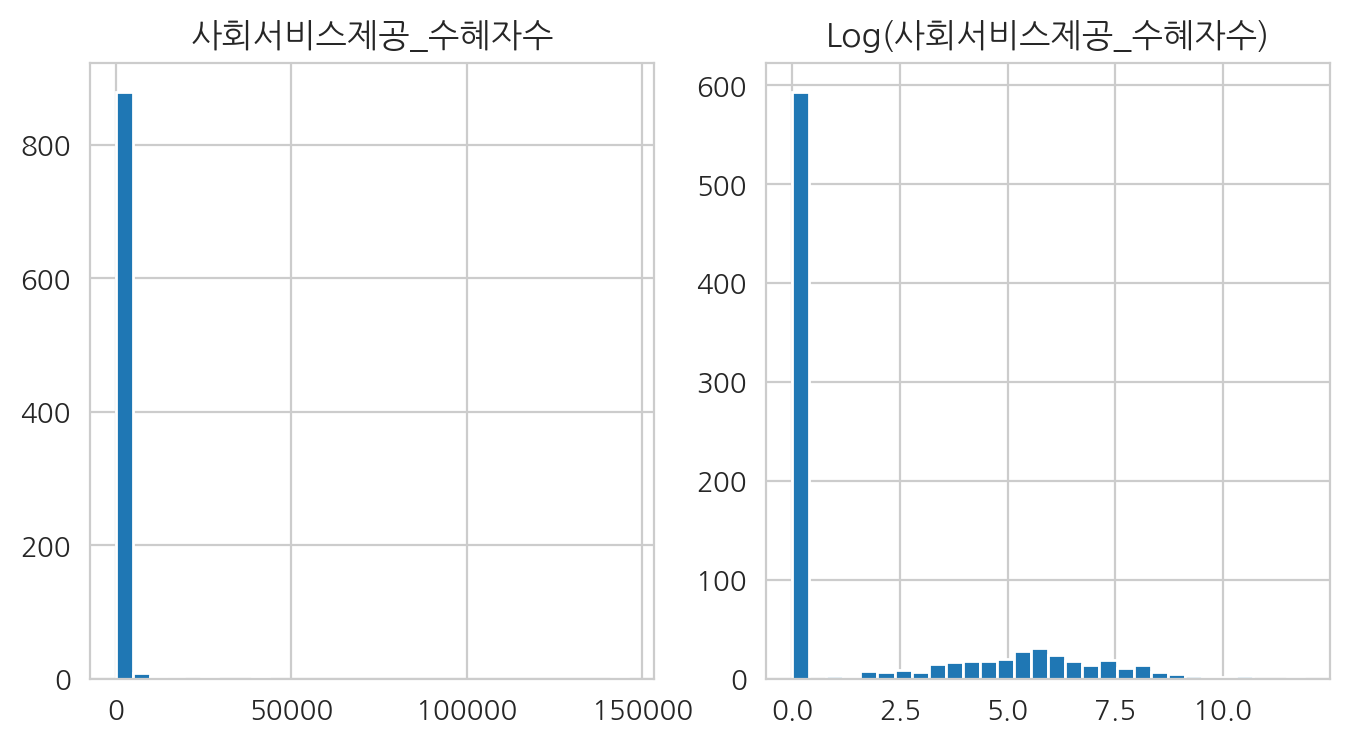

Variables to consider for log transformation: ['지분율1', '지분보유기업', '취약계층평균근로시간', '비취약계층평균임금', '비취약계층평균근로시간', '당기순이익_2021']


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 변수들의 분포를 확인하고 로그 변환을 고려할 변수 확인
variables_to_transform = []
for column in num.columns:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title(column)
    plt.hist(num[column], bins=30)

    plt.subplot(1, 2, 2)
    plt.title(f'Log({column})')
    plt.hist(np.log1p(num[column]), bins=30)

    skewness_before = num[column].skew()
    skewness_after = np.log1p(num[column]).skew()

    if abs(skewness_after) > abs(skewness_before):
        variables_to_transform.append(column)

plt.show()

print("Variables to consider for log transformation:", variables_to_transform)

In [ ]:
columns_to_log = ['이사회_연간개최회수', '지분보유인원', '취약계층평균근로시간', '비취약계층근로자총인원',
                  '비취약계층평균임금', '비취약계층평균근로시간', '유급근로자평균근로시간', '취약계층_제공인원',
                  '비취약계층_제공인원', '사회서비스_총인원수', '매출액_2020', '매출액_2021',
                  '영업이익_2020', '영업이익_2021', '당기순이익_2020', '당기순이익_2021',
                  '정부지원_2020', '정부지원_2021', '기업후원_2020', '기업후원_2021',
                  '일반지원_2020', '일반지원_2021', '근로자처우개선_수혜자수', '기타_지역사회',
                  '지역사회재투자_수혜자수', '사회서비스제공_수혜자수']

# 로그 변환 적용 및 support_s에 적용
support_s[columns_to_log] = np.log1p(support_s[columns_to_log])

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [ ]:
support_s.dropna(inplace=True)

###5. 정규화(사회적 성과)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

selected_cols = ['이사회_연간개최회수', '지분율1', '공동대표여부', '지분보유인원', '지분보유기업',
       '취약계층평균근로시간', '비취약계층근로자총인원', '비취약계층평균임금', '비취약계층평균근로시간', '유급근로자평균근로시간',
    '영업이익_2020', '영업이익_2021', '당기순이익_2020', '당기순이익_2021',
       '정부지원_2020', '정부지원_2021', '기업후원_2020', '기업후원_2021', '일반지원_2020',
       '일반지원_2021', '근로자처우개선_수혜자수', '기타_지역사회', '지역사회재투자_수혜자수',
       '사회서비스제공_수혜자수', '비취약계층_제공인원', '취약계층_제공인원', '사회서비스_총인원수', '매출액_2020', '매출액_2021']

# 데이터에 MinMaxScaler 적용
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(support_s[selected_cols])

# # 정규화된 데이터를 support_s에 대체
# support_s[selected_cols] = normalized_data

In [ ]:
selected_cols = ['영업이익_2020', '영업이익_2021', '당기순이익_2020', '당기순이익_2021',
       '정부지원_2020', '정부지원_2021', '기업후원_2020', '기업후원_2021', '일반지원_2020',
       '일반지원_2021','매출액_2020', '매출액_2021']

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(support_s[selected_cols])

In [ ]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.8 MB/s eta 0:00:00


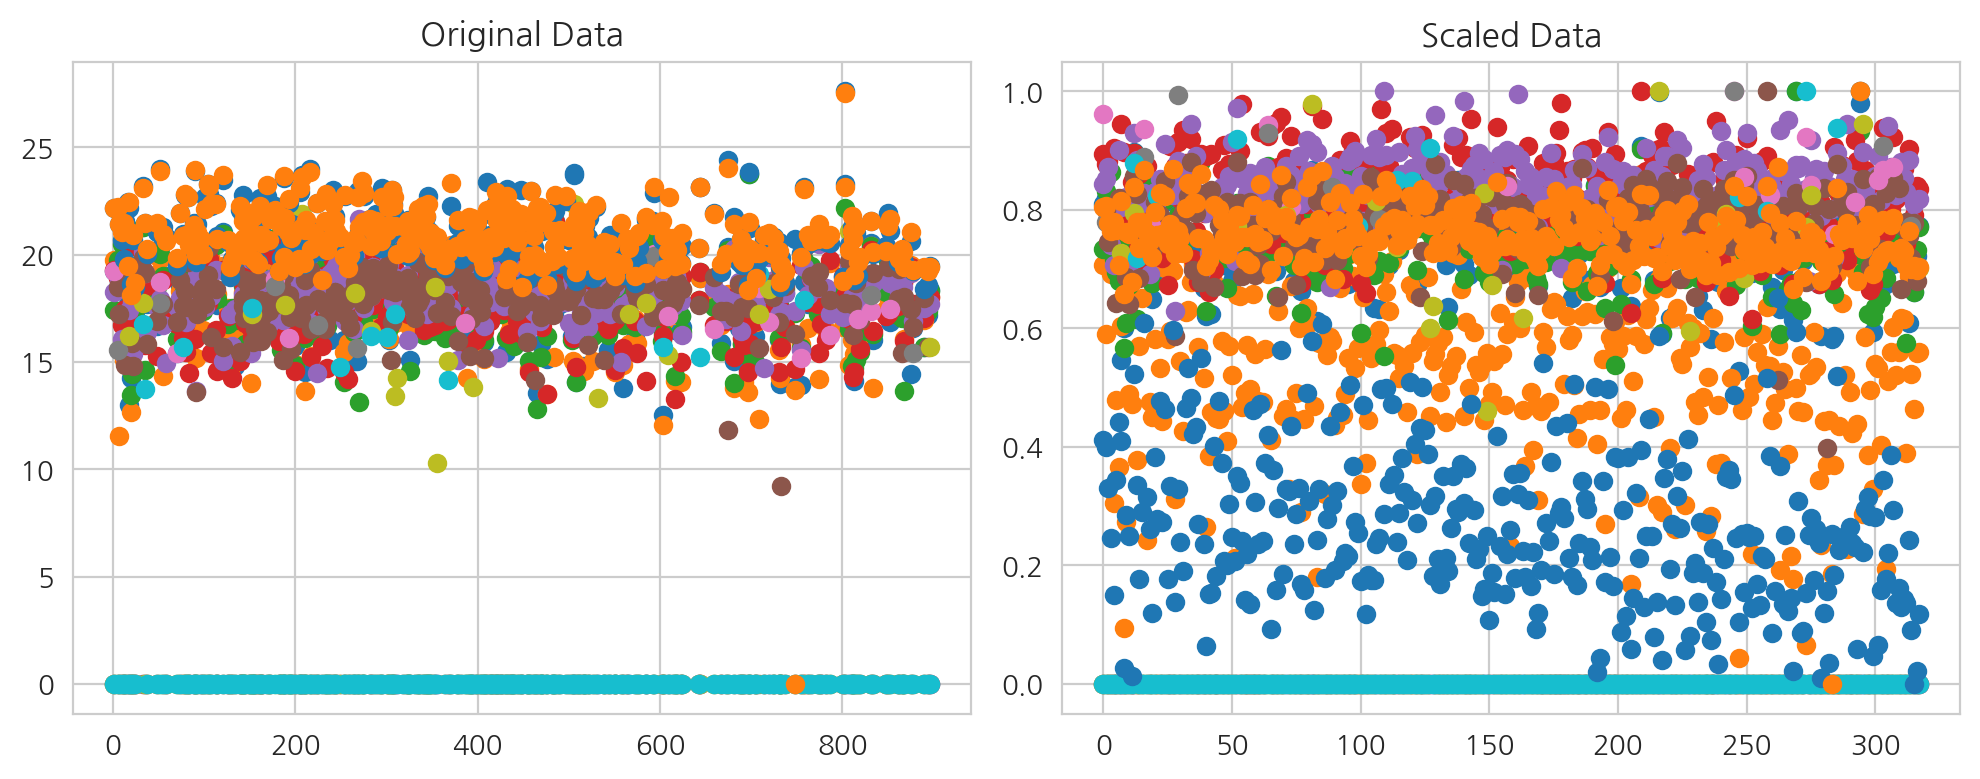

In [ ]:
import mglearn
import matplotlib.pyplot as plt

# Min-Max 정규화 수행
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(support_s[selected_cols])

# 데이터 프레임 생성
original_df = pd.DataFrame(support_s, columns=selected_cols)
normalized_df = pd.DataFrame(normalized_data, columns=selected_cols)

# 데이터 시각화
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(original_df, 'o')
plt.title("Original Data")

plt.subplot(1, 2, 2)
plt.plot(normalized_df, 'o')
plt.title("Scaled Data")

plt.tight_layout()
plt.show()

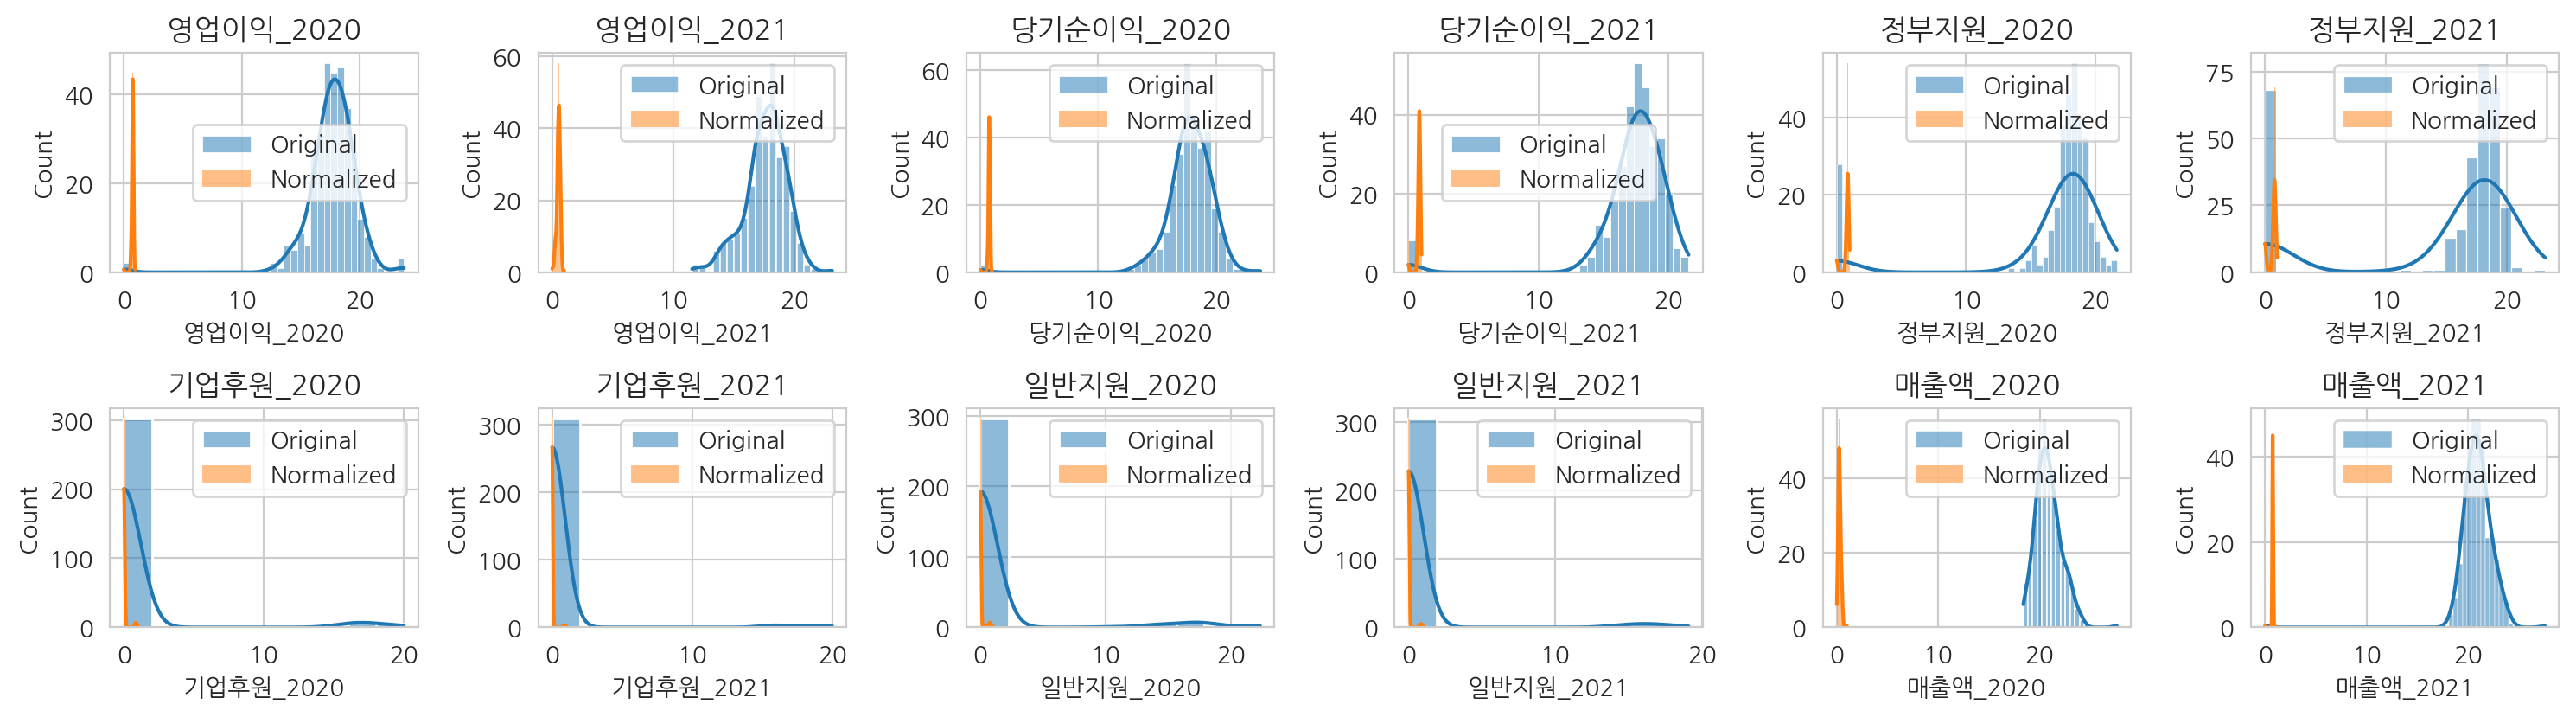

In [ ]:
# 정규화 전 데이터
original_data = support_s[selected_cols]

# Min-Max 정규화 후 데이터
normalized_data = scaler.transform(original_data)

# 데이터 프레임 생성
original_df = pd.DataFrame(original_data, columns=selected_cols)
normalized_df = pd.DataFrame(normalized_data, columns=selected_cols)

# 정규화 전과 후의 데이터 분포 비교
plt.figure(figsize=(15, 10))

for i, column in enumerate(selected_cols, 1):
    plt.subplot(5, 6, i)
    sns.histplot(original_df[column], label='Original', kde=True)
    sns.histplot(normalized_df[column], label='Normalized', kde=True)
    plt.title(column)
    plt.legend()

plt.tight_layout()
plt.show()

###6. OLS 회귀분석 및 다중공선성 확인

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  # statsmodels 모듈 임포트
# 종속변수와 독립변수 분리
y = support_s['사회적 성과']
X = support_s.drop(columns=['사회적 성과'])

# 상수항 추가
X = sm.add_constant(X)

# OLS 모델 피팅
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 사회적 성과   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     2.000
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.23e-05
Time:                        01:41:13   Log-Likelihood:                -594.46
No. Observations:                 318   AIC:                             1393.
Df Residuals:                     216   BIC:                             1777.
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -394.4874   1855.932     -0.213      0.832   -4052.544    3263.569
인증번호                               0.0003      0.001      0.210      0.834      -0.002       0.003
이사회_연간개최회수                         0.9081      0.272      3.335      0.001       0.371       1.445
지분율1                              -0.0030      0.005     -0.604      0.547      -0.013       0.007
공동대표여부                            -0.5205      0.477     -1.090      0.277      -1.462       0.421
지분보유인원                            -0.2488      0.275     -0.905      0.367      -0.791       0.293
지분보유기업                             1.3234      0.692      1.911      0.057      -0.041       2.688
취약계층평균근로시간                         0.7392      0.228      3.244      0.001       0.290       1.188
비취약계층근로자총인원                       -0.0425      0.224     -0.190      0.850      -0.485       0.400
비취약계층평균임금                          0.2913      0.307      0.948      0.344      -0.315       0.897
비취약계층평균근로시간                       -1.8096      1.220     -1.483      0.139      -4.214       0.595
유급근로자평균근로시간                        1.2968      0.979      1.325      0.186      -0.632       3.225
취약계층_제공인원                         -0.0823      0.122     -0.675      0.501      -0.323       0.158
비취약계층_제공인원                        -0.0537      0.089     -0.603      0.547      -0.229       0.122
사회서비스_총인원수                         0.0737      0.133      0.553      0.581      -0.189       0.336
매출액_2020                           0.3675      0.193      1.899      0.059      -0.014       0.749
매출액_2021                           0.0663      0.128      0.519      0.605      -0.186       0.318
영업이익_2020                          0.0493      0.158      0.313      0.754      -0.261       0.360
영업이익_2021                          0.1649      0.104      1.591      0.113      -0.039       0.369
당기순이익_2020                        -0.1928      0.155     -1.244      0.215      -0.498       0.113
당기순이익_2021                        -0.0147      0.043     -0.344      0.731      -0.099       0.069
정부지원_2020                          0.0368      0.026      1.401      0.163      -0.015       0.089
정부지원_2021                          0.0363      0.019      1.877      0.062      -0.002       0.074
기업후원_2020                         -0.0030      0.040     -0.075      0.940      -0.081       0.075
기업후원_2021                          0.0527      0.052      1.008      0.315      -0.050       0.156
일반지원_2020                         -0.0228      0.033     -0.693      0.489      -0.088       0.042
일반지원_2021                          0.0350      0.044      0.799      0.425      -0.051       0.121
주업종_건설업(F)                       -26.2616    123.678     -0.212      0.832    -270.031     217.508
주업종_광업(B)     

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features']=X.columns
vif=vif.sort_values('VIF Factor').reset_index(drop=True)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,0.000000,const
1,1.517620,이사회_연간개최회수
2,1.557736,지역사회재투자_수혜자수
3,1.599654,당기순이익_2021
4,1.649475,지분보유기업
5,1.688236,정부지원_2020
6,1.708951,공동대표여부
7,1.744508,일반지원_2021
8,1.770802,일반지원_2020
9,1.780703,기타_지역사회


In [ ]:
selected_features = vif[vif['VIF Factor'] < 10]['features']
X_selected = X[selected_features]

In [ ]:
X_selected.columns

Index(['const', '이사회_연간개최회수', '지역사회재투자_수혜자수', '당기순이익_2021', '지분보유기업',
       '정부지원_2020', '공동대표여부', '일반지원_2021', '일반지원_2020', '기타_지역사회', '정부지원_2021',
       '사회서비스제공_수혜자수', '기업후원_2020', '취약계층평균근로시간', '기업후원_2021', '근로자처우개선_수혜자수',
       '지분율1', '지분보유인원', '영업이익_2021', '유급근로자평균근로시간', '비취약계층근로자총인원', '매출액_2021',
       '비취약계층_제공인원', '매출액_2020', '당기순이익_2020'],
      dtype='object')

In [ ]:
# 상수항 추가
X = sm.add_constant(X)

# 새로운 모델 피팅
model = sm.OLS(y, X_selected).fit()

# 모델 성능 평가 및 결과 확인
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 사회적 성과   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     4.523
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.62e-10
Time:                        01:41:19   Log-Likelihood:                -649.34
No. Observations:                 318   AIC:                             1349.
Df Residuals:                     293   BIC:                             1443.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.2220      2.990     -0.743      0.458      -8.106       3.662
이사회_연간개최회수       0.9424      0.246      3.833      0.000       0.459       1.426
지역사회재투자_수혜자수     0.0994      0.058      1.719      0.087      -0.014       0.213
당기순이익_2021       0.0144      0.037      0.389      0.697      -0.058       0.087
지분보유기업           0.9609      0.583      1.648      0.100      -0.187       2.108
정부지원_2020        0.0038      0.023      0.167      0.867      -0.041       0.048
공동대표여부          -0.7334      0.390     -1.879      0.061      -1.502       0.035
일반지원_2021        0.0319      0.038      0.840      0.402      -0.043       0.107
일반지원_2020       -0.0031      0.029     -0.108      0.914      -0.060       0.053
기타_지역사회         -0.0553      0.352     -0.157      0.875      -0.748       0.638
정부지원_2021        0.0362      0.016      2.267      0.024       0.005       0.068
사회서비스제공_수혜자수     0.0307      0.045      0.679      0.498      -0.058       0.120
기업후원_2020       -0.0362      0.032     -1.137      0.256      -0.099       0.026
취약계층평균근로시간       0.7683      0.179      4.289      0.000       0.416       1.121
기업후원_2021        0.0288      0.041      0.696      0.487      -0.053       0.110
근로자처우개선_수혜자수     0.0562      0.086      0.653      0.514      -0.113       0.225
지분율1             0.0007      0.004      0.155      0.877      -0.008       0.009
지분보유인원          -0.1485      0.234     -0.634      0.527      -0.610       0.312
영업이익_2021        0.1490      0.089      1.681      0.094      -0.025       0.323
유급근로자평균근로시간     -0.7212      0.636     -1.133      0.258      -1.974       0.531
비취약계층근로자총인원     -0.2583      0.154     -1.675      0.095      -0.562       0.045
매출액_2021         0.0127      0.096      0.132      0.895      -0.177       0.202
비취약계층_제공인원      -0.0867      0.045     -1.943      0.053      -0.175       0.001
매출액_2020         0.4895      0.147      3.336      0.001       0.201       0.778
당기순이익_2020      -0.1129      0.065     -1.740      0.083      -0.241       0.015
==============================================================================
Omnibus:                       30.632   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.887
Skew:                           0.642   Prob(JB):                     1.79e-10
Kurtosis:                       4.318   Cond. No.                     2.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###7. 모델링 진행

In [ ]:
support_s.set_index('인증번호', inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

selected_features = ['사회서비스제공_수혜자수', '지분보유인원', '정부지원_2020', '이사회_연간개최회수', '공동대표여부',
       '지역사회재투자_수혜자수', '기업후원_2021', '지분보유기업', '근로자처우개선_수혜자수', '지분율1',
       '기타_지역사회', '정부지원_2021', '당기순이익_2021', '일반지원_2021', '취약계층평균근로시간',
       '비취약계층평균임금', '유급근로자평균근로시간', '비취약계층평균근로시간', '일반지원_2020', '기업후원_2020',
       '비취약계층근로자총인원', '당기순이익_2020', '영업이익_2021', '영업이익_2020', '주업종_건설업(F)', '주업종_광업(B)', '주업종_교육 서비스업(P)',
       '주업종_금융 및 보험업(K)', '주업종_기타', '주업종_농업, 임업 및 어업(A)', '주업종_도매 및 소매업(G)',
       '주업종_보건업 및 사회복지 서비스업(Q)', '주업종_부동산업 및 임대업(L)',
       '주업종_사업시설관리 및 사업지원 서비스업(N)', '주업종_숙박 및 음식점업(I)',
       '주업종_예술, 스포츠 및 여가관련 서비스업(R) ', '주업종_운수업(H)', '주업종_전기, 가스, 증기 및 수도사업(D)',
       '주업종_전문, 과학 및 기술 서비스업(M)', '주업종_제조업(C)', '주업종_출판, 영상, 방송통신 및 정보서비스업(J)',
       '주업종_하수, 폐기물처리, 원료재생 및 환경복원업(E)', '주업종_협회 및 단체, 수리 및 개인 서비스업(S)',
       '인증유형_사회서비스제공형', '인증유형_일자리제공형', '인증유형_지역사회공헌형', '인증유형_창의 혁신형',
       '인증유형_혼합형', '광역시도명_강원도', '광역시도명_경기도', '광역시도명_경상남도',
       '광역시도명_경상북도', '광역시도명_광주광역시', '광역시도명_대구광역시', '광역시도명_대전광역시',
       '광역시도명_부산광역시', '광역시도명_서울특별시', '광역시도명_세종특별자치시', '광역시도명_울산광역시',
       '광역시도명_인천광역시', '광역시도명_전라남도', '광역시도명_전라북도', '광역시도명_제주특별자치도',
       '광역시도명_충청남도', '광역시도명_충청북도', '인증년도_2007', '인증년도_2008', '인증년도_2009',
       '인증년도_2010', '인증년도_2011', '인증년도_2012', '인증년도_2013', '인증년도_2014',
       '인증년도_2015', '인증년도_2016', '인증년도_2017', '인증년도_2018', '인증년도_2019',
       '인증년도_2020', '인증년도_2021']

X_features = support_s[selected_features]
y_target=support_s['사회적 성과']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                    test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

X_features=support_s.drop(columns=['사회적 성과'])
y_target=support_s['사회적 성과']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                    test_size=0.2, random_state=42)

In [ ]:
pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 42.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from pygam import LinearGAM
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# 랜덤 포레스트 모델 평가
rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print("Random Forest MAE:", rf_mae)

# Random Forest 모델의 R2 스코어 계산
rf_r2 = r2_score(y_test, rf_predictions)
print("Random Forest R2 Score:", rf_r2)

# RMSE 계산
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
print("Random Forest RMSE:", rf_rmse)

# XGBoost 모델 생성 및 학습
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# XGBoost 모델 평가
xgb_predictions = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
print("XGBoost MAE:", xgb_mae)

# XGBoost 모델의 R2 스코어 계산
xgb_r2 = r2_score(y_test, xgb_predictions)
print("XGBoost R2 Score:", xgb_r2)

# RMSE 계산
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
print("XGBoost RMSE:", xgb_rmse)

# GAM 모델 생성 및 학습
gam_model = LinearGAM()
gam_model.fit(X_train, y_train)

# GAM 모델 평가
gam_predictions = gam_model.predict(X_test)
gam_mae = mean_absolute_error(y_test, gam_predictions)
print("GAM MAE:", gam_mae)

# GAM 모델의 R2 스코어 계산
gam_r2 = r2_score(y_test, gam_predictions)
print("GAM R2 Score:", gam_r2)

# RMSE 계산
gam_mse = mean_squared_error(y_test, gam_predictions)
gam_rmse = np.sqrt(gam_mse)
print("GAM RMSE:", gam_rmse)

# GBM 모델 생성 및 학습
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

# GBM 모델 평가
gbm_predictions = gbm_model.predict(X_test)
gbm_mae = mean_absolute_error(y_test, gbm_predictions)
print("GBM MAE:", gbm_mae)

# GBM 모델의 R2 스코어 계산
gbm_r2 = r2_score(y_test, gbm_predictions)
print("GBM R2 Score:", gbm_r2)

# RMSE 계산
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_rmse = np.sqrt(gbm_mse)
print("GBM RMSE:", gbm_rmse)

Random Forest MAE: 1.5455266748628245
Random Forest R2 Score: -0.28285856802712206
Random Forest RMSE: 2.0393557330200305
XGBoost MAE: 1.6649767653846634
XGBoost R2 Score: -0.37857904060512193
XGBoost RMSE: 2.114070345081577
GAM MAE: 1.558533000484399
GAM R2 Score: -0.15433513431221768
GAM RMSE: 1.9345036601625263
GBM MAE: 1.5091493530981226
GBM R2 Score: -0.18336382428080178
GBM RMSE: 1.9586766359746473


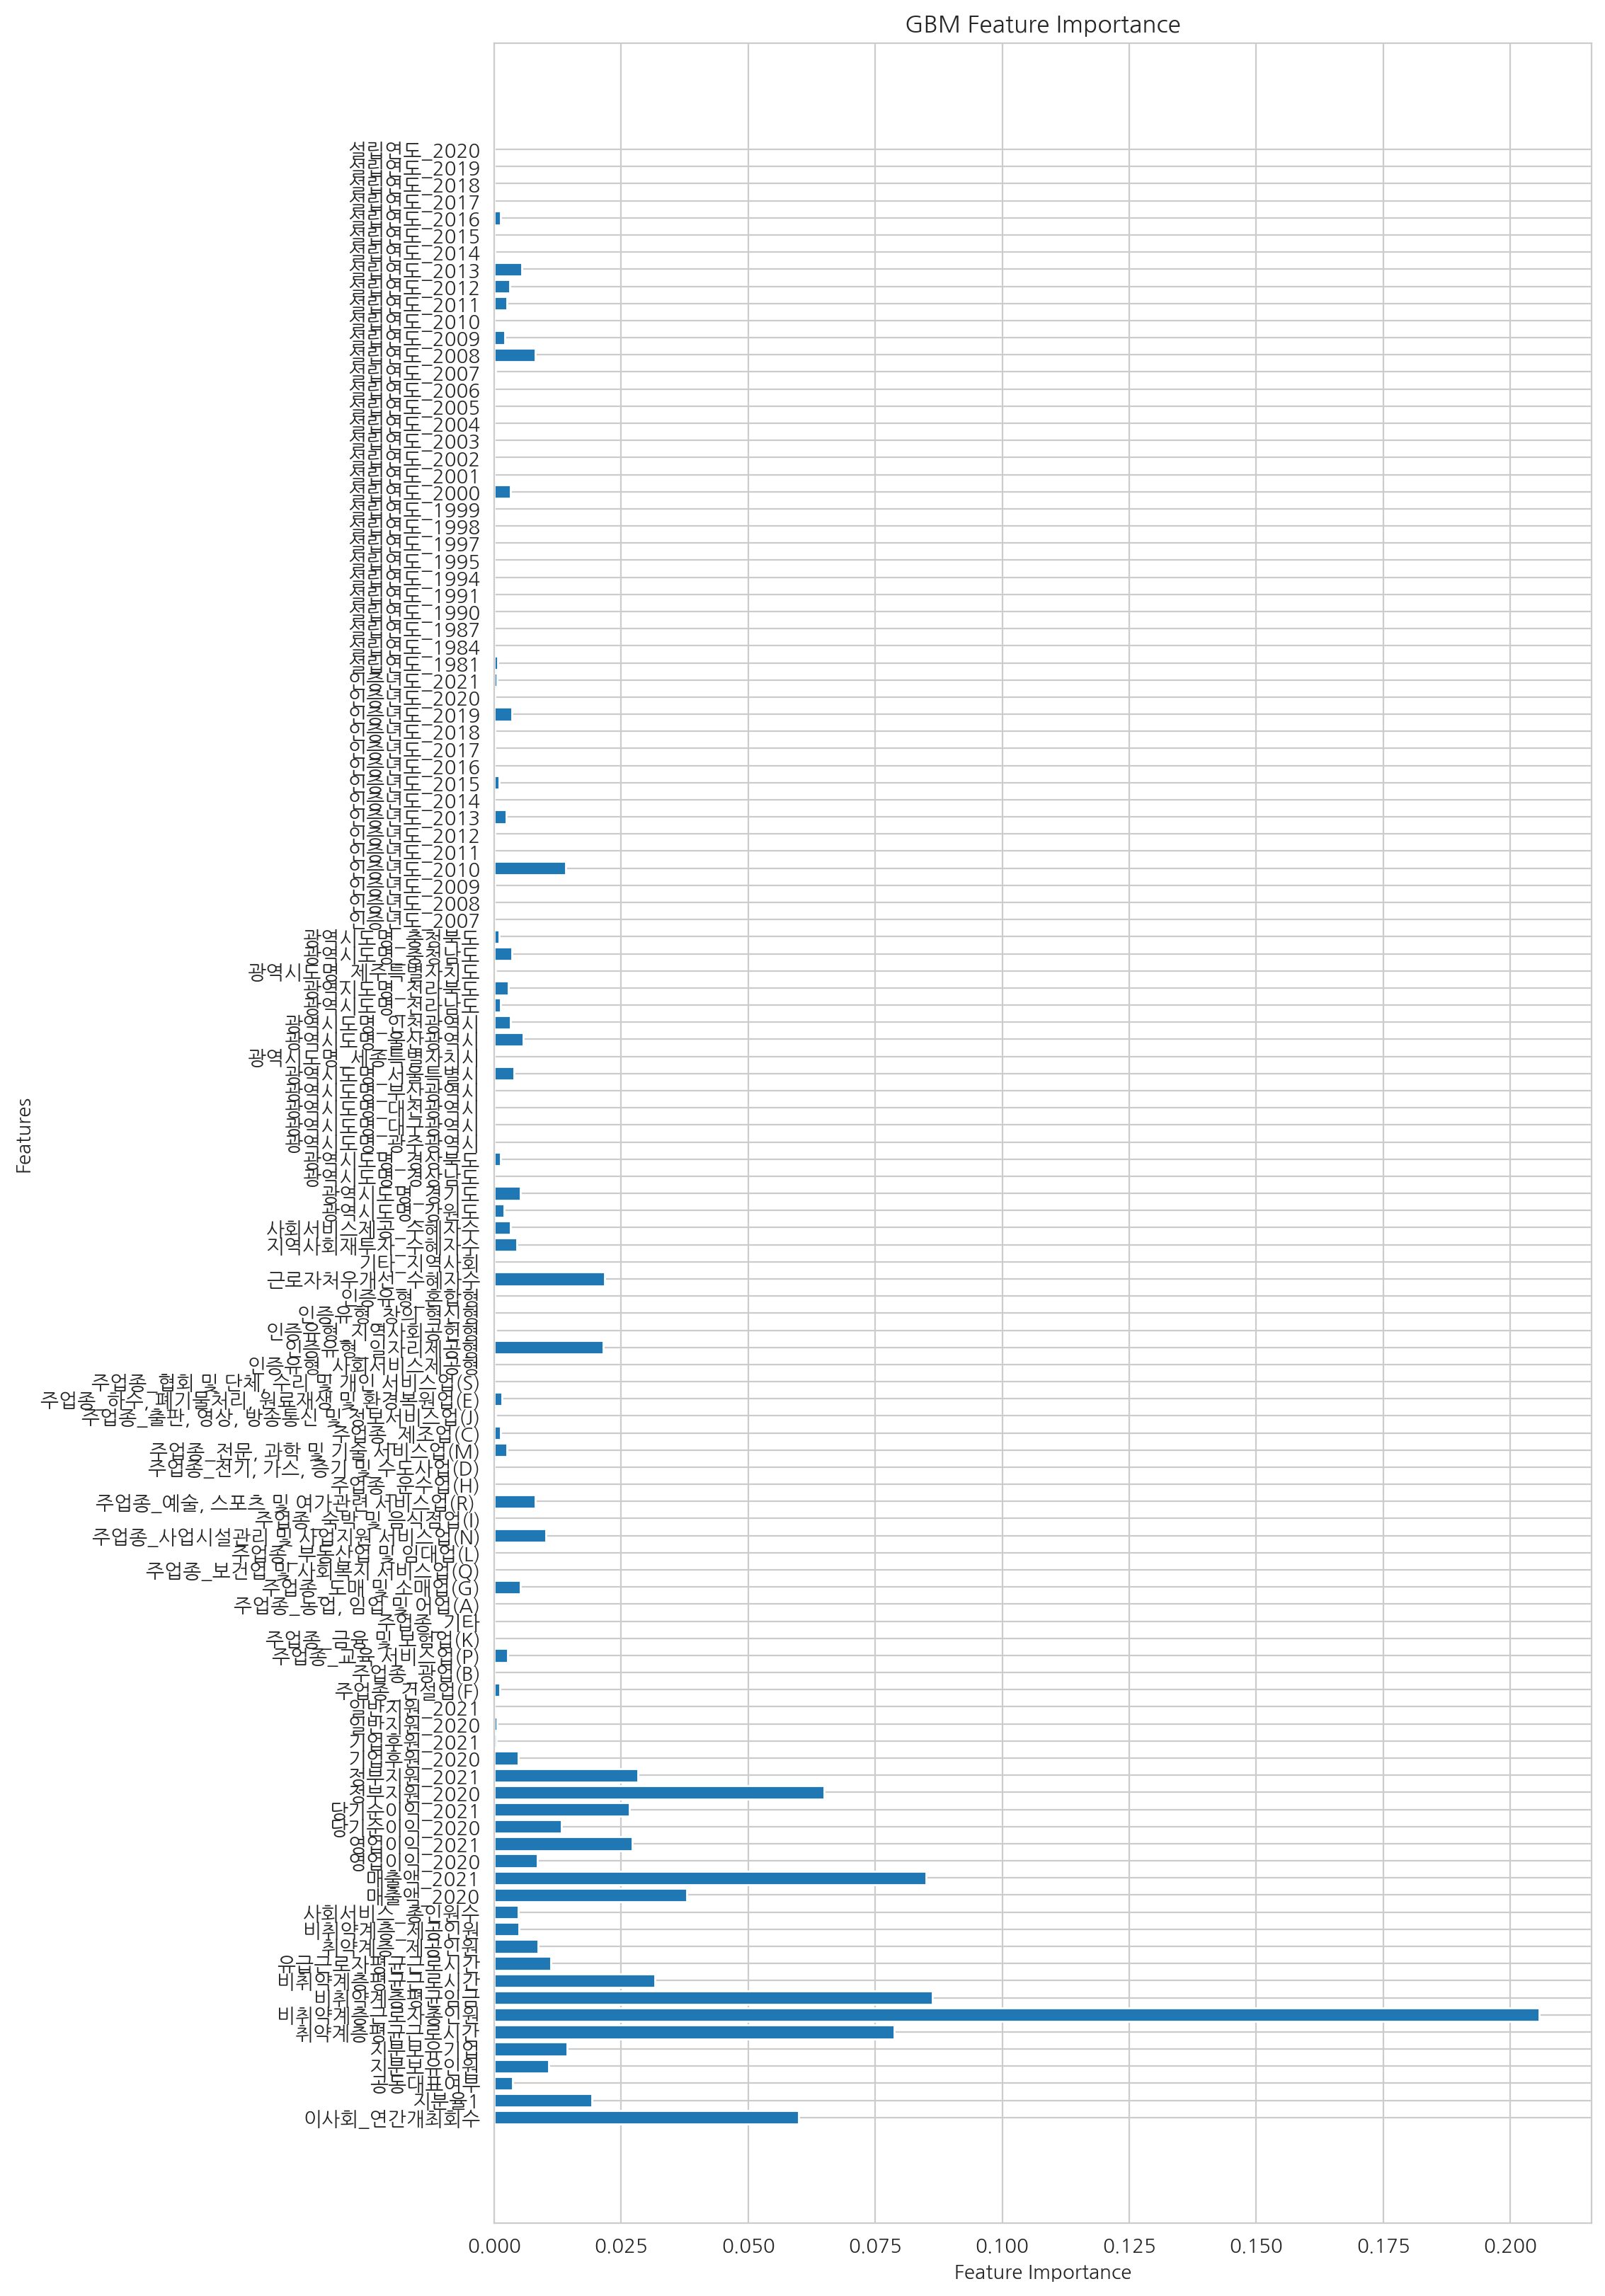

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# GBM 모델 생성
gbm_model = GradientBoostingRegressor()

# 모델 학습
gbm_model.fit(X_train, y_train)

# Feature Importance 추출
feature_importance = gbm_model.feature_importances_

# 각 특성의 이름
feature_names = X_train.columns

# 시각화
plt.figure(figsize=(10, 20))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('GBM Feature Importance')
plt.show()